#                Projet de python for Data Analysis
## Kenny GUILLOUCHE et Clément GENOT

Le but du projet est d'analyser un jeu de données en profondeur et de créer et trouver le meilleur modèle par rapport à la problématiques posées. Le meilleur model sera ensuite disposé sous la forme d'une API.

Voici le jeu de données qui nous a été attribué : https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand#

Ce jeu de données concerne les vélos disposés un peu partout dans la ville de Séoul en libre service (équivalent au Velib à Paris)
Il contient les colonnes suivantes :

- Date : format year-month-day 
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius = température minimale annoncé
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours) = bool indiquant si la station de vélo était active

A noter que la colonne "Rented Bike count" est notre objectif à prédire. Elle correspond au nombre de vélos loués à chaque heure d'une journée ce qui correspond donc à la résolution d'un problème de régression supervisé. 

# Analyse des données

In [1]:
#Lecture du dataset
import pandas as pd
dataset = pd.read_csv("SeoulBikeData.csv")

In [146]:
dataset.head(48)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [147]:
#la date est à transformer
#en année, jour, mois, jour_semaine, isweekend

In [148]:
#La date doit être décomposé afin de pouvoir être interprétable
dataset["Date"] = pd.to_datetime(dataset["Date"],dayfirst=True)
dataset["Year"] = dataset["Date"].apply(lambda x: x.year)
dataset["Month"] = dataset["Date"].apply(lambda x: x.month)
dataset["Day"] = dataset["Date"].apply(lambda x: x.day)

In [149]:
#Nous rajoutons les jours de la semaine car les weekends ont peut-être une incidence sur les locations de vélo
#0 = lundi à 6 = dimanche
dataset["DayOfWeek"] = dataset["Date"].dt.dayofweek

In [150]:
#Nous pensons aussi que le weekend a peut-etre une incidence sur les vélos loués 
dataset["isWeekEnd"] = [True if int(x)>4 else False for x in dataset["DayOfWeek"]]

In [3]:
dataset.head(48)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


**Regardons l'impact des températures sur les locations de vélo**

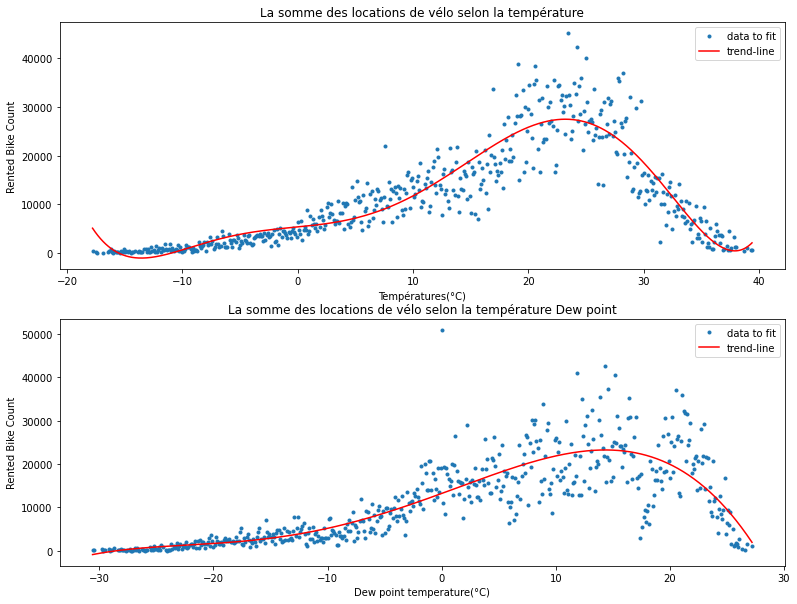

In [152]:
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax2) = plt.subplots(2,figsize=(13,10))

data = dataset[["Temperature(°C)", "Rented Bike Count"]].groupby("Temperature(°C)").sum().reset_index()
data

x = data["Temperature(°C)"]
y = data["Rented Bike Count"]

# 6th degree poly
z = np.polyfit(x, y, 6) 
p = np.poly1d(z)

xx = np.linspace(x.min(), x.max(), 1000)

ax1.set_xlabel('Températures(°C)')
ax1.set_ylabel('Rented Bike Count')
ax1.set_title("La somme des locations de vélo selon la température")
ax1.plot(x, y, '.', xx, p(xx),'-r')
ax1.legend(['data to fit', 'trend-line'])

data = dataset[["Dew point temperature(°C)", "Rented Bike Count"]].groupby("Dew point temperature(°C)").sum().reset_index()
x2 = data["Dew point temperature(°C)"]
y2 = data["Rented Bike Count"]

# 4th degree poly
z2 = np.polyfit(x2, y2, 4) 
p2 = np.poly1d(z2)

xx2 = np.linspace(x2.min(), x2.max(), 1000)
ax2.set_title("La somme des locations de vélo selon la température Dew point")
ax2.set_xlabel('Dew point temperature(°C)')
ax2.set_ylabel('Rented Bike Count')

ax2.plot(x2, y2, '.', xx2, p2(xx2),'-r')
ax2.legend(['data to fit', 'trend-line'])

On remarque que la température a un fort impact sur les locations de vélo, en effet, les températures plus douces amènent plus les gens à prendre le vélo pour aller au travail ou tout simplement pour se déplacer lors d'un trajet.

**Regardons l'impact des saisons sur les locations de vélo**

<BarContainer object of 4 artists>

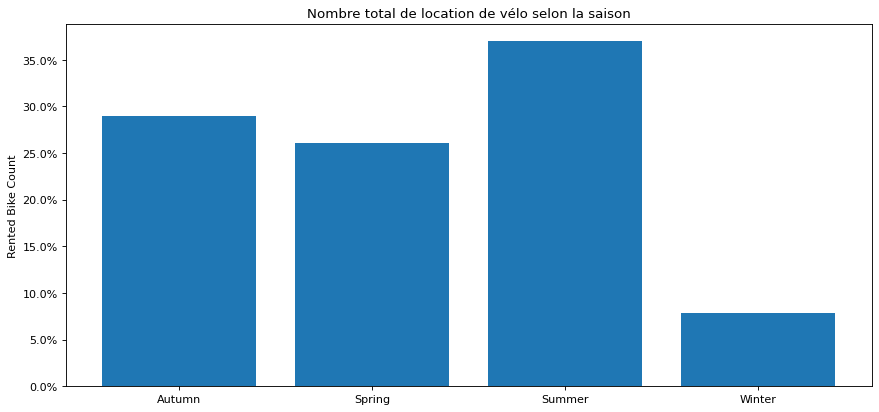

In [153]:
from matplotlib.pyplot import figure
import matplotlib.ticker as mtick
figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')

season_sum = dataset[["Seasons", "Rented Bike Count"]].groupby("Seasons").sum().reset_index()
season_sum


total_rent_bike = season_sum["Rented Bike Count"].sum()
total_rent_bike
season_sum["Rented Bike Count"] = season_sum["Rented Bike Count"].apply(lambda x : (x/total_rent_bike)*100)
season_sum
axes = plt.gca()
axes.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Nombre total de location de vélo selon la saison")
plt.ylabel("Rented Bike Count")
plt.bar(season_sum["Seasons"], season_sum["Rented Bike Count"])

Pour faire écho au température, les saisons estivales sont plus propice à la location de vélo, en effet 37% des vélos sont loués durant l'été contre seulement 8% en hiver. Ces données vont permettre de créer notre modèle mais aussi peuvent indiquer des stratégies autres, par exemple si une campagne de maintenance est nécessaire, il est probablement plus judicieux de la faire en hiver car la demande sera moins élevée.

**Regardons l'évolution des vélos loués en fonction de la date**

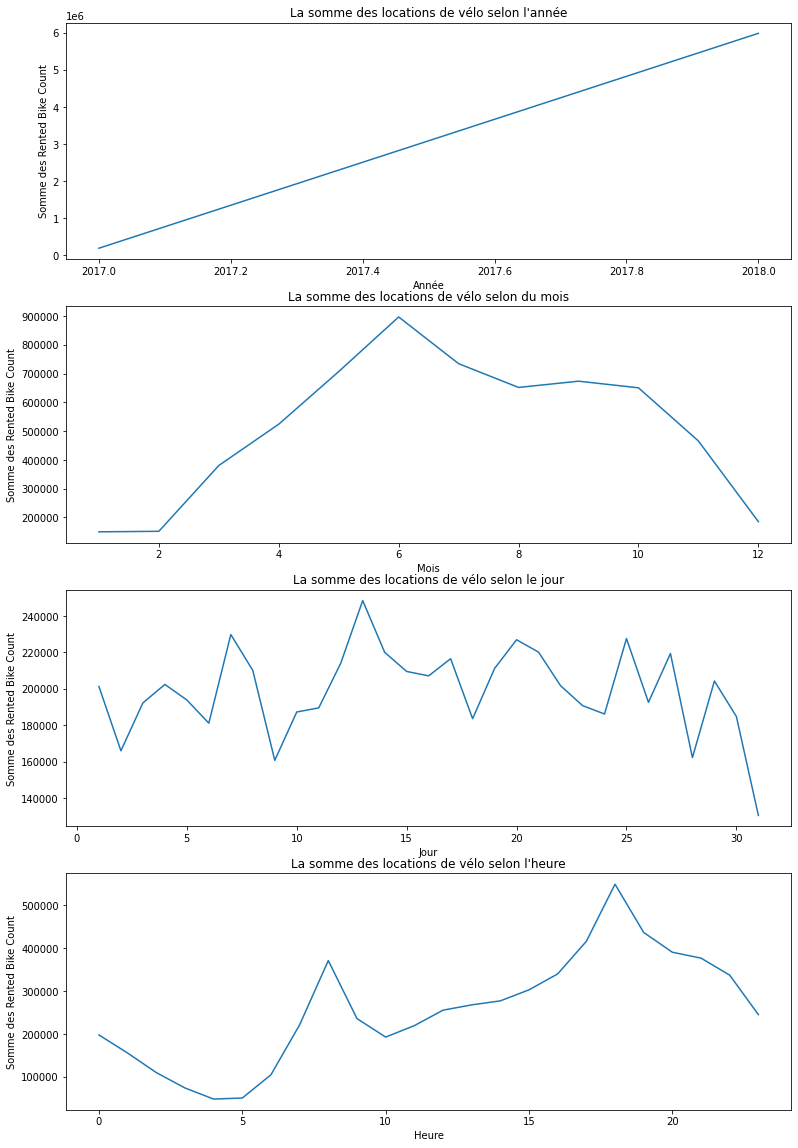

In [154]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,figsize=(13,20))

#Année
year_sum = dataset[["Year", "Rented Bike Count"]].groupby("Year").sum().reset_index()
year_sum
ax1.set_title("La somme des locations de vélo selon l'année")
ax1.set_xlabel('Année')
ax1.set_ylabel('Somme des Rented Bike Count')

ax1.plot(year_sum["Year"], year_sum["Rented Bike Count"])

#Mois
month_sum = dataset[["Month", "Rented Bike Count"]].groupby("Month").sum().reset_index()
month_sum
ax2.set_title("La somme des locations de vélo selon du mois")
ax2.set_xlabel('Mois')
ax2.set_ylabel('Somme des Rented Bike Count')

ax2.plot(month_sum["Month"], month_sum["Rented Bike Count"])

#Jours
day_sum = dataset[["Day", "Rented Bike Count"]].groupby("Day").sum().reset_index()
day_sum
ax3.set_title("La somme des locations de vélo selon le jour")
ax3.set_xlabel('Jour')
ax3.set_ylabel('Somme des Rented Bike Count')

ax3.plot(day_sum["Day"], day_sum["Rented Bike Count"])

#Heures
hour_sum = dataset[["Hour", "Rented Bike Count"]].groupby("Hour").sum().reset_index()
hour_sum
ax4.set_title("La somme des locations de vélo selon l'heure")
ax4.set_xlabel('Heure')
ax4.set_ylabel('Somme des Rented Bike Count')

ax4.plot(hour_sum["Hour"], hour_sum["Rented Bike Count"])

Les graphiques ci-dessus sont très intéressants car ils montrent une certaine habitude des Coréens. On peut notamment voir que nous avons des mois, des jours et des heures vraiment propices à la location de vélos. Cela doit probablement être lié aux horaires de travail, aux vacances scolaires ou d'autres facteurs tel que la température comme on l'a vu précédemment

**Regardons l'évolution des vélos  loués à partir du jour de la semaine**

<BarContainer object of 7 artists>

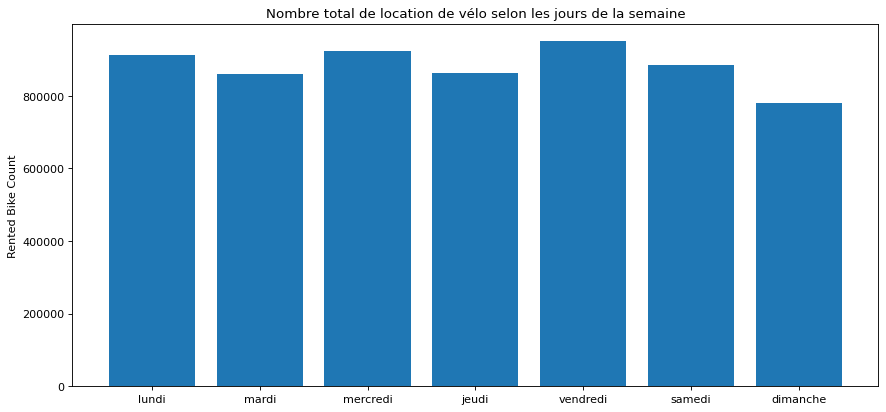

In [155]:
import matplotlib.ticker as mtick
figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')

day_sum = dataset[["DayOfWeek", "Rented Bike Count"]].groupby("DayOfWeek").sum().reset_index()
day_sum

plt.title("Nombre total de location de vélo selon les jours de la semaine")
plt.ylabel("Rented Bike Count")
lst_jour_semaine = ["lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche"]
plt.bar(lst_jour_semaine, day_sum["Rented Bike Count"])

A première vue, le jour de la semaine n'a pas vraiment d'incidence sur le nombre de vélo loués. Cependant il s'agit d'une moyenne sur l'année. Essayons de voir mois par mois si cela change nos résultats:

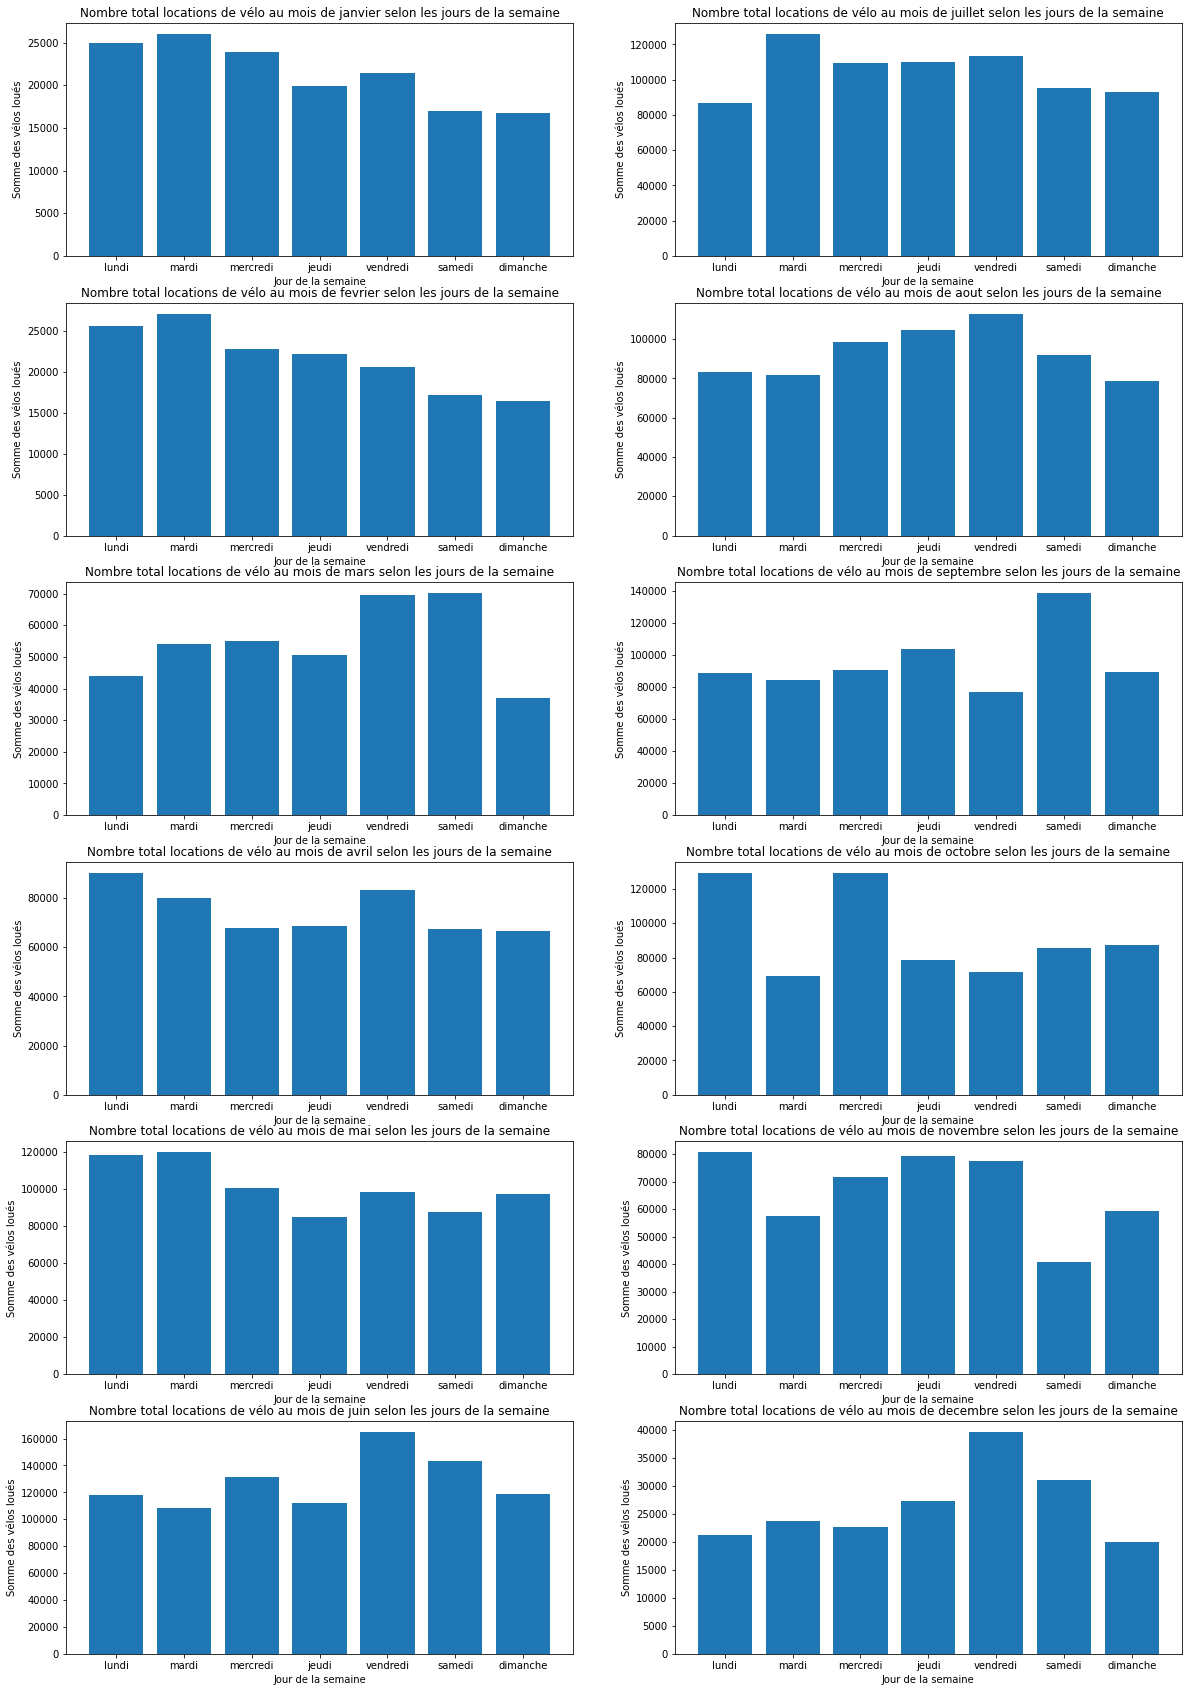

In [156]:
lst_jour_semaine = ["lundi","mardi","mercredi","jeudi","vendredi","samedi","dimanche"]
lst_mois = ["janvier","fevrier","mars","avril","mai","juin","juillet","aout","septembre","octobre","novembre","decembre"]
fig, axs = plt.subplots(6,2,figsize=(20,30))
for i in range(1,13):
    day_sum = dataset[dataset["Month"]==i]
    day_sum = day_sum[["DayOfWeek", "Rented Bike Count"]].groupby("DayOfWeek").sum().reset_index()
    day_sum
    
    if i<7 :
        axs[i-1,0].set_title("Nombre total locations de vélo au mois de "+ lst_mois[i-1] +" selon les jours de la semaine")
        axs[i-1,0].set_xlabel('Jour de la semaine')
        axs[i-1,0].set_ylabel('Somme des vélos loués')
        axs[i-1,0].bar(lst_jour_semaine, day_sum["Rented Bike Count"])
    else:
        axs[i-7,1].set_title("Nombre total locations de vélo au mois de "+ lst_mois[i-1] +" selon les jours de la semaine")
        axs[i-7,1].set_xlabel('Jour de la semaine')
        axs[i-7,1].set_ylabel('Somme des vélos loués')
        axs[i-7,1].bar(lst_jour_semaine, day_sum["Rented Bike Count"])

Sous cette forme, on peut voir que le jour de la semaine influe sur le nombre de vélo loués, cela est plus marqué sur certains mois.

**Regardons l'évolution du nombre de vélos loués selon certains critère météorologique Humidity(%)	Wind speed (m/s)**

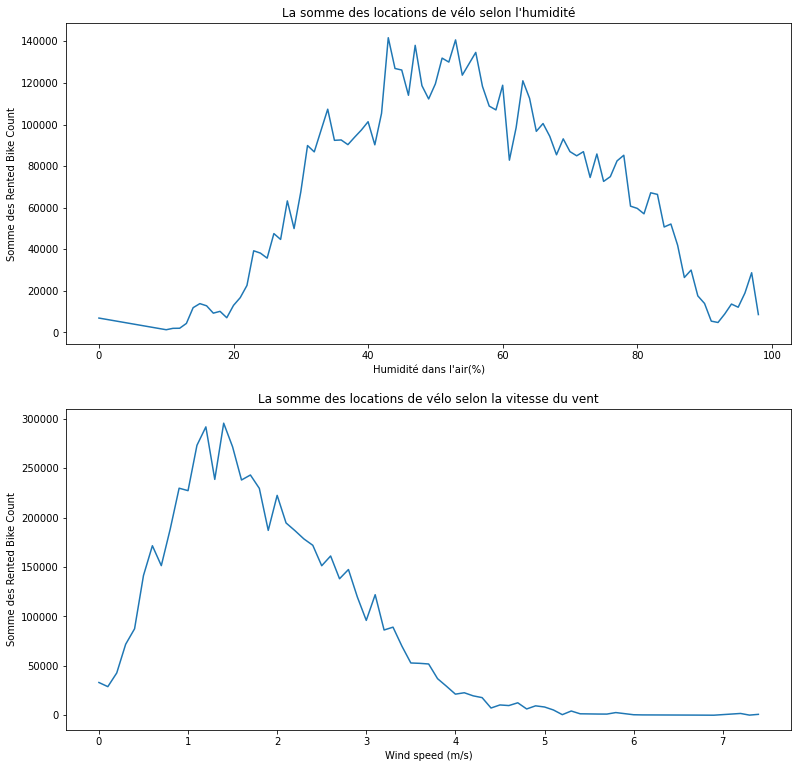

In [157]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(13,13))

#Humidité
humidity_sum = dataset[["Humidity(%)", "Rented Bike Count"]].groupby("Humidity(%)").sum().reset_index()
humidity_sum
ax1.set_title("La somme des locations de vélo selon l'humidité")
ax1.set_xlabel('Humidité dans l\'air(%)')
ax1.set_ylabel('Somme des Rented Bike Count')

ax1.plot(humidity_sum["Humidity(%)"], humidity_sum["Rented Bike Count"])

#WindSpeed
wind_speed_sum = dataset[["Wind speed (m/s)", "Rented Bike Count"]].groupby("Wind speed (m/s)").sum().reset_index()
wind_speed_sum
ax2.set_title("La somme des locations de vélo selon la vitesse du vent")
ax2.set_xlabel('Wind speed (m/s)')
ax2.set_ylabel('Somme des Rented Bike Count')

ax2.plot(wind_speed_sum["Wind speed (m/s)"], wind_speed_sum["Rented Bike Count"])

Le vent et l'humidité dans l'air ont un impact sur les vélos loués cela est probablement dû aussi au mois car avec un climat océanique, ils sont peut-être souvent à des événements climatiques sur certaines périodes de l'année.

**Nous avons également l'impression que certaines colonnes ont un nombre très élevé de NA ou de 0. Vérifions notre pressentiment** 

Le poucentage de valeur à 0 dans la colonne RainFall 93.97260273972603
Le poucentage de valeur à 0 dans la colonne SnowFall 94.94292237442923


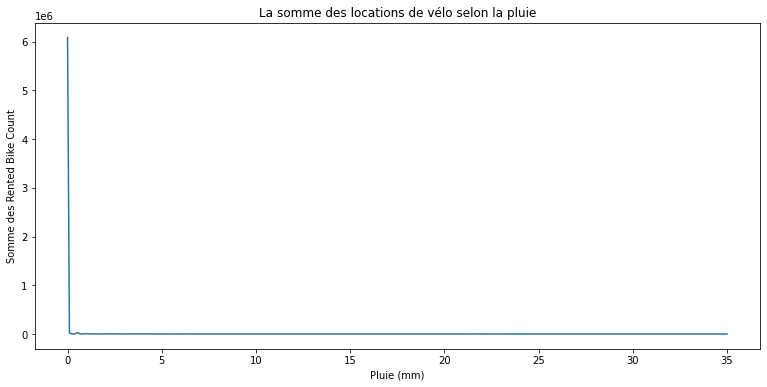

In [158]:
#Rainfall(mm)
nb_zero_rainfall = len(dataset[dataset["Rainfall(mm)"] == 0])
nb_ligne = len(dataset)
ratio_na_rainfall = (nb_zero_rainfall/nb_ligne) * 100
print("Le poucentage de valeur à 0 dans la colonne RainFall " + str(ratio_na_rainfall))

#Snowfall (cm)
nb_zero_snowfall = len(dataset[dataset["Snowfall (cm)"] == 0])
ratio_na_rainfall = (nb_zero_snowfall/nb_ligne) * 100
print("Le poucentage de valeur à 0 dans la colonne SnowFall " + str(ratio_na_rainfall))

fig, (ax1) = plt.subplots(1,figsize=(13,6))

#RainFall
rainfall_sum = dataset[["Rainfall(mm)", "Rented Bike Count"]].groupby("Rainfall(mm)").sum().reset_index()
rainfall_sum
ax1.set_title("La somme des locations de vélo selon la pluie")
ax1.set_xlabel('Pluie (mm)')
ax1.set_ylabel('Somme des Rented Bike Count')

ax1.plot(rainfall_sum["Rainfall(mm)"], rainfall_sum["Rented Bike Count"])

On peut voir que 95% du temps il ne pleut pas ou ne neige pas en corée du sud et que lorsqu'il pleut le nombre de vélos loués est quasiment null

# Model et prediction

Maintenant que l'analyse des données est faite, nous allons réfléchir aux modèles à employer.
Il s'agit d'un problème de régression, nous allons donc employer les différents algorithmes associés à ce genre de problème.
Ainsi dans cette partie nous allons aborder les algorithmes suivants :

- Régression linéaire simple
- Régression polynomiale
- Random Forest
- LGB 
- XGBoost
- CatBoost

Pour déterminer lequel ce des algorithmes nous donnera les meilleurs résultats nous allons tout d'abord découper notre dataset en train et test afin d'évaluer notre modèle sur des données auxquels il n'a pas pu s'entrainer.

Ensuite au niveau de l'évaluation des modèles nous allons utiliser le R2 et RMSE qui permettent de donner une indication de l'erreur de notre modèle. R2 est compris entre 0 et 1 , plus il est proche de 1 est plus notre algorithme est précis.
RMSE c'est l'inverse, plus il est faible et plus il signifie que l'erreur est faible et donc que notre algorithme est performant

Mais avant de commencer, modifions et séparons nos données pour les modèles.

## Transformation et séparation des données pour les modèles

Il faut savoir que les données en string ne sont pas interprétable tel quel par un algorithme, il faut les transformer soit en énumérations, soit en vecteur. Ici nous allons les transformer en énumérations :

In [159]:
#transformation des colonnes string en élément interprétable par une régression linéaire
#vecteur, int, float, bool

#Transformons les saisons string en énumération sous forme de int
#0 : winter, 1 : spring, 2 : summer, 3 : automn
mapping = {k: v for v, k in enumerate(dataset["Seasons"].unique())}
dataset['Seasons'] = dataset["Seasons"].map(mapping)

#Transformons string Functionning Day en boolean
dataset["Functioning Day"] = [True if x=="Yes" else False for x in dataset["Functioning Day"]]

#Transformons string Holiday en boolean
dataset["Holiday"] = [False if x=="No Holiday" else True for x in dataset["Holiday"]]

#On retire la Date car on l'a déjà décomposée et les datetime ne sont pas interprétable par un modèle
#De plus on pourrait la transformer en timestamp et la considérer comme un id
dataset = dataset.drop('Date', 1)

Regardons ce que nous obtenons :

In [160]:
dataset.head(10)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,DayOfWeek,isWeekEnd
0,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
1,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
2,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
3,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
4,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
5,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
6,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
7,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,False,True,2017,12,1,4,False
8,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,False,True,2017,12,1,4,False
9,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,False,True,2017,12,1,4,False


### Séparation des données en train et test

Le but est de séparer notre dataset en train et test afin de pouvoir évaluer la capacité de notre modèle à répondre à notre besoin.

In [161]:
from sklearn.model_selection import train_test_split
y = dataset.pop('Rented Bike Count')
X = dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [162]:
len(X_train)

7008

In [163]:
len(X_test)

1752

### Régression linéaire simple

Le premier algorithme que nous allons utiliser est une régression linéaire simple. Cela consiste à essayer de résoudre l'équation y = a*X+b.

- y = le nombre de vélos loués par heure (à déterminer)
- x = les autres données de notre dataset
- a et b = coefficient à déterminer

In [164]:
#Régression simple
import sklearn
from sklearn.linear_model import LinearRegression

#création et entrainement du modèle
modeleReg=sklearn.linear_model.LinearRegression()

In [166]:
#---------------------Erreur possible--------------------------
#ATTention si l'erreur suivante apparait "LinAlgError: SVD did not converge in Linear Least Squares"
#Ce n'est pas du aux données cela vient d'un bug dans la version de jupyter 
#qui ne prend pas rapidement en compte le chargement de la lib
#Il suffit d'éxecuter cette cellule une deuxième fois pour que ça compile via "ctrl+Enter" ou via le bouton Exécuter
#puis faire un cell=>run all below pour reprendre la compilation globale de toute les cellules
#--------------------------------------------------------------

modeleReg.fit(X_train,y_train)

LinearRegression()

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Prédiction des vélos loués sur nos données de test
y_test_predict = modeleReg.predict(X_test)

#Détermination de notre RMSE et R2
rmse_reg_simple = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_reg_simple = r2_score(y_test, y_test_predict)

In [168]:
print("Nous avons comme RMSE : " + str(rmse_reg_simple) + " et comme R2 : " + str(r2_reg_simple))

Nous avons comme RMSE : 441.4404866217178 et comme R2 : 0.5322897806527519


Ce premier algorithme nous donne des résultats assez médiocre cela vient du fait qu'il a du mal à trouver une droite permettant de représenter les données. Essayons donc de l'améliorer en ne passant plus par une droite mais par un polynome de degré N.

## Régression polynomiale

Afin d'améliorer notre premier résultat, nous allons passer par des polynomes cela signifie que notre nouvelle formule est y = a*X + b*X + c*X.... + constante

- y = le nombre de vélos loués par heure (à déterminer)
- X = les autres données de notre dataset
- a,b,c...,constante = coefficient à déterminer

In [169]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Création d'un polynome de degré 2
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X_train)

#Création du modèle
model_rlp = LinearRegression()
model_rlp.fit(x_poly, y_train)

LinearRegression()

In [170]:
#Prédiction et évaluation du modèle
X_test_poly = polynomial_features.fit_transform(X_test)
y_test_predict = model_rlp.predict(X_test_poly)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

In [171]:
print("Nous avons comme RMSE : " + str(rmse) + " et comme R2 : " + str(r2))

Nous avons comme RMSE : 368.90348126876296 et comme R2 : 0.673368517040478


On peut déjà voir qu'avec un degré 2, nous obtenons déjà de meilleurs résultats. Cependant, il faut déterminer le meilleur degré pour nos données. Egalement toutes les donnnées ne sont pas utiles nous décidons de réduire le dataset pour obtenir de meilleurs résultats.

In [172]:
X2_train = X_train[["Hour","Temperature(°C)","Humidity(%)","Month"]]
X2_test = X_test[["Hour","Temperature(°C)","Humidity(%)","Month"]]

def RegressionLineairePolynomiale(degree_polynome):
    polynomial_features= PolynomialFeatures(degree=degree_polynome)
    x_poly = polynomial_features.fit_transform(X2_train)
    X_test_poly = polynomial_features.fit_transform(X2_test)

    # Création et entrainement du modèle
    model = LinearRegression()
    model.fit(x_poly, y_train)
    
    # Evaluation du testing set
    y_test_predict = model.predict(X_test_poly)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
    return r2,rmse
    
list_rmse=[]
list_r2 = []
for i in range(1,11):
    r2,rmse = RegressionLineairePolynomiale(i)
    list_r2.append(r2)
    list_rmse.append(rmse)

Affichons l'évolution de nos critères d'évaluation (RMSE et R2) en fonction du degré du polynome

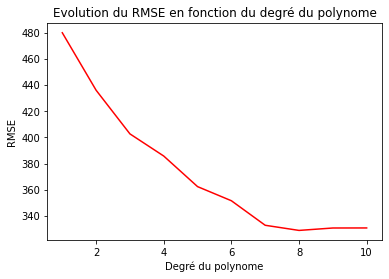

In [173]:
plt.plot(range(1, 11), list_rmse, color='r')
plt.title("Evolution du RMSE en fonction du degré du polynome")
plt.ylabel("RMSE")
plt.xlabel("Degré du polynome")
plt.show()

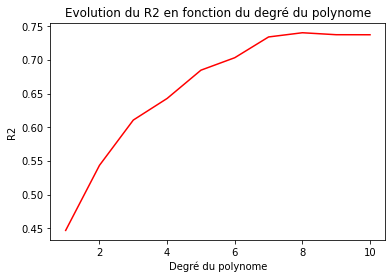

In [174]:
plt.plot(range(1, 11), list_r2, color='r')
plt.title("Evolution du R2 en fonction du degré du polynome")
plt.ylabel("R2")
plt.xlabel("Degré du polynome")
plt.show()

D'après les deux graphiques ci-dessus le meilleur degré est de 8.

In [175]:
rmse_reg_polynomiale = min(list_rmse)
r2_reg_polynomiale = max(list_r2)
print("Nous avons comme RMSE : " + str(rmse_reg_polynomiale) + " et comme R2 : " + str(r2_reg_polynomiale))

Nous avons comme RMSE : 328.9767937923207 et comme R2 : 0.740245510318013


## Random Forest

RandomForest : "L'algorithme des forêts d'arbres décisionnels effectue un apprentissage sur de multiples arbres de décision entraînés sur des sous-ensembles de données légèrement différents.". Globalement on va construire différents arbres avec différentes colonnes de notre dataset que l'on va entrainer sur nos données et ensuite on va essayer de déterminer le meilleur arbre parmi tous ceux créés.

RandomForest a deux paramètres très important :
- max_depth = la profondeur des arbres
- n_estimators = le nombre d'arbres

Nous allons boucler différentes valeurs sur ces paramètres afin de trouver le meilleur modèle de RandomForest pour nos données

In [176]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

list_rmse =[]
list_r2 = []

#de profondeur 1 à 16
for i in range(1,17):
    regr = RandomForestRegressor(max_depth=i, random_state=42)
    regr.fit(X_train, y_train)
    y_test_predict = regr.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
    list_rmse.append(rmse)
    list_r2.append(r2)

In [177]:
#+1 car une liste comme à 0 alors que notre boucle commence à 1
print("La profondeur des arbres optimale est : " + str(list_r2.index(max(list_r2))+1))

La profondeur des arbres optimale est : 16


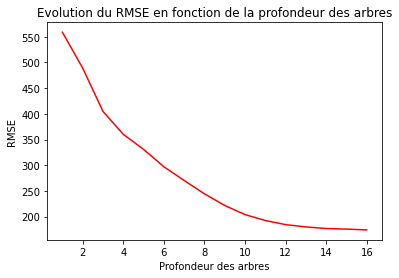

In [178]:
plt.plot(range(1, 17), list_rmse, color='r')
plt.title("Evolution du RMSE en fonction de la profondeur des arbres")
plt.ylabel("RMSE")
plt.xlabel("Profondeur des arbres")
plt.show()

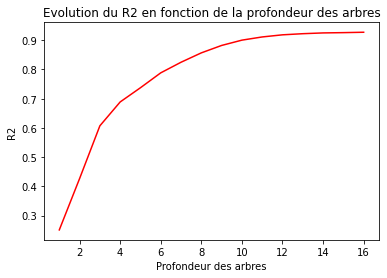

In [179]:
plt.plot(range(1, 17), list_r2, color='r')
plt.title("Evolution du R2 en fonction de la profondeur des arbres")
plt.ylabel("R2")
plt.xlabel("Profondeur des arbres")
plt.show()

In [180]:
rmse_svm = min(list_rmse)
r2_svm = max(list_r2)
print("Nous avons comme RMSE : " + str(rmse_svm) + " et comme R2 : " + str(r2_svm))

Nous avons comme RMSE : 174.14292104990295 et comme R2 : 0.9272146146846664


In [181]:
list_rmse =[]
list_r2 = []

#nombre d'arbres de 5 à 200
for i in range(1,41):
    nb_arbre = 5*i
    regr = RandomForestRegressor(max_depth=16, random_state=42,n_estimators=nb_arbre)
    regr.fit(X_train, y_train)
    y_test_predict = regr.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
    list_rmse.append(rmse)
    list_r2.append(r2)

In [182]:
#+1 car une liste comme à 0 alors que notre boucle commence à 1
print("Le nombre d'arbre optimal est : " + str((list_r2.index(max(list_r2))+1)*5))

Le nombre d'arbre optimal est : 95


In [183]:
rmse_svm = min(list_rmse)
r2_svm = max(list_r2)
print("Nous avons comme RMSE : " + str(rmse_svm) + " et comme R2 : " + str(r2_svm))

Nous avons comme RMSE : 174.08320778866442 et comme R2 : 0.9272645220543231


Pour conclure, RandomForest donne de bien meilleurs résultats que les techniques utilisées précédemment notamment grâce aux techniques de Bootstrap qu'elle utilise. Afin d'améliorer davantage nos résultats nous allons tester différents algorithmes de boosting.

## Gradient boosting

Le principe du gradient boosting ressemble au bagging vu précédemment avec randomForest. C'est-à-dire que l'on va créer plusieurs modèles que nous agrégeons ensuite pour n'avoir qu'un seul résultat. Pour chaque modèle créé nous allons calculer la différence entre ce que nous avons obtenu et le résulat attendu (appelée la "fonction de perte"). A partir de celui-ci nous allons imputé des poids à chaques nodes des modèles. Puis on recommence encore et encore X fois, ce qui va permettre au fur et à mesure d'apprendre des erreurs passées.

## LGB

LGB est le premier algorithme de boosting que nous allons essayé, il est connu pour être "light" et donc efficace sur :
- la mémoire
- la rapidité d'entrainement
- la gestion d'une grande masse de données

In [184]:
#!pip install lightgbm

In [185]:
import lightgbm as lgb

#Création en entrainement du modele
gbm = lgb.LGBMRegressor(objective='regression',num_leaves=100,learning_rate=0.2,n_estimators=3000,random_state=42)
gbm.fit(X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric='l2_root',
    early_stopping_rounds=10)

[1]	valid_0's rmse: 543.443	valid_0's l2: 295331
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 458.869	valid_0's l2: 210560
[3]	valid_0's rmse: 392.794	valid_0's l2: 154287
[4]	valid_0's rmse: 343.607	valid_0's l2: 118066
[5]	valid_0's rmse: 303.011	valid_0's l2: 91815.8
[6]	valid_0's rmse: 272.855	valid_0's l2: 74449.7
[7]	valid_0's rmse: 251.217	valid_0's l2: 63110.2
[8]	valid_0's rmse: 232.065	valid_0's l2: 53854.2
[9]	valid_0's rmse: 218.392	valid_0's l2: 47695.2
[10]	valid_0's rmse: 208.434	valid_0's l2: 43444.8
[11]	valid_0's rmse: 199.595	valid_0's l2: 39838.1
[12]	valid_0's rmse: 193.947	valid_0's l2: 37615.4
[13]	valid_0's rmse: 187.276	valid_0's l2: 35072.1
[14]	valid_0's rmse: 181.683	valid_0's l2: 33008.7
[15]	valid_0's rmse: 178.33	valid_0's l2: 31801.4
[16]	valid_0's rmse: 175.639	valid_0's l2: 30849.2
[17]	valid_0's rmse: 173.341	valid_0's l2: 30047.2
[18]	valid_0's rmse: 170.192	valid_0's l2: 28965.2
[19]	valid_0's rmse: 168.668	valid_

LGBMRegressor(learning_rate=0.2, n_estimators=3000, num_leaves=100,
              objective='regression', random_state=42)

In [186]:
#Prédiction et calcul du R2 et RMSE
y_test_predict = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
rmse_lgb = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_lgb = r2_score(y_test, y_test_predict)

In [187]:
rmse_lgb

147.77360407342013

In [188]:
r2_lgb

0.9475885389462484

Avec des paramètres mis par défaut on obtient déjà un meilleur résultat par rapport au randomForest, essayons de trouver les paramètres idéaux :

In [189]:
#A la recherche des meilleurs paramètres
def LGB(learning_r,nb_estimators,nb_leaves):
    gbm = lgb.LGBMRegressor(objective='regression',num_leaves=nb_leaves,learning_rate=learning_r,n_estimators=nb_estimators,random_state=42, silent=True)
    gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l2_root',
        early_stopping_rounds=10)
    
    y_test_predict = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
    rmse= (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)
    return r2,rmse
    
#Regardons le meilleur learning rate
list_rmse =[]
list_r2 = []
list_learning_rate = []
for i in range(1,101):
    learning_r= 0.01 *i
    list_learning_rate.append(learning_r)
    print("-"*10 +"learning rate = " + str(learning_r))
    r2,rmse = LGB(learning_r,3000,100)
    list_rmse.append(rmse)
    list_r2.append(r2)

----------learning rate = 0.01
[1]	valid_0's rmse: 640.261	valid_0's l2: 409934
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 635.118	valid_0's l2: 403375
[3]	valid_0's rmse: 629.982	valid_0's l2: 396877
[4]	valid_0's rmse: 624.88	valid_0's l2: 390476
[5]	valid_0's rmse: 619.921	valid_0's l2: 384302
[6]	valid_0's rmse: 614.912	valid_0's l2: 378117
[7]	valid_0's rmse: 610.05	valid_0's l2: 372161
[8]	valid_0's rmse: 605.185	valid_0's l2: 366248
[9]	valid_0's rmse: 600.375	valid_0's l2: 360450
[10]	valid_0's rmse: 595.712	valid_0's l2: 354873
[11]	valid_0's rmse: 591.011	valid_0's l2: 349294
[12]	valid_0's rmse: 586.346	valid_0's l2: 343801
[13]	valid_0's rmse: 581.793	valid_0's l2: 338483
[14]	valid_0's rmse: 577.29	valid_0's l2: 333264
[15]	valid_0's rmse: 572.849	valid_0's l2: 328156
[16]	valid_0's rmse: 568.353	valid_0's l2: 323026
[17]	valid_0's rmse: 564.03	valid_0's l2: 318130
[18]	valid_0's rmse: 559.493	valid_0's l2: 313033
[19]	valid_0's rmse: 

[324]	valid_0's rmse: 175.898	valid_0's l2: 30940.1
[325]	valid_0's rmse: 175.72	valid_0's l2: 30877.6
[326]	valid_0's rmse: 175.517	valid_0's l2: 30806.3
[327]	valid_0's rmse: 175.312	valid_0's l2: 30734.3
[328]	valid_0's rmse: 175.156	valid_0's l2: 30679.7
[329]	valid_0's rmse: 175.003	valid_0's l2: 30625.9
[330]	valid_0's rmse: 174.818	valid_0's l2: 30561.2
[331]	valid_0's rmse: 174.657	valid_0's l2: 30505.2
[332]	valid_0's rmse: 174.455	valid_0's l2: 30434.4
[333]	valid_0's rmse: 174.295	valid_0's l2: 30378.7
[334]	valid_0's rmse: 174.14	valid_0's l2: 30324.7
[335]	valid_0's rmse: 173.951	valid_0's l2: 30258.9
[336]	valid_0's rmse: 173.755	valid_0's l2: 30190.9
[337]	valid_0's rmse: 173.59	valid_0's l2: 30133.6
[338]	valid_0's rmse: 173.398	valid_0's l2: 30066.9
[339]	valid_0's rmse: 173.235	valid_0's l2: 30010.4
[340]	valid_0's rmse: 173.046	valid_0's l2: 29945
[341]	valid_0's rmse: 172.879	valid_0's l2: 29887.3
[342]	valid_0's rmse: 172.689	valid_0's l2: 29821.4
[343]	valid_0's r

[503]	valid_0's rmse: 156.706	valid_0's l2: 24556.7
[504]	valid_0's rmse: 156.638	valid_0's l2: 24535.4
[505]	valid_0's rmse: 156.608	valid_0's l2: 24526.1
[506]	valid_0's rmse: 156.548	valid_0's l2: 24507.3
[507]	valid_0's rmse: 156.486	valid_0's l2: 24487.8
[508]	valid_0's rmse: 156.417	valid_0's l2: 24466.3
[509]	valid_0's rmse: 156.34	valid_0's l2: 24442.2
[510]	valid_0's rmse: 156.267	valid_0's l2: 24419.5
[511]	valid_0's rmse: 156.199	valid_0's l2: 24398.2
[512]	valid_0's rmse: 156.14	valid_0's l2: 24379.7
[513]	valid_0's rmse: 156.091	valid_0's l2: 24364.5
[514]	valid_0's rmse: 156.005	valid_0's l2: 24337.5
[515]	valid_0's rmse: 155.934	valid_0's l2: 24315.4
[516]	valid_0's rmse: 155.873	valid_0's l2: 24296.4
[517]	valid_0's rmse: 155.811	valid_0's l2: 24277
[518]	valid_0's rmse: 155.766	valid_0's l2: 24263.1
[519]	valid_0's rmse: 155.706	valid_0's l2: 24244.5
[520]	valid_0's rmse: 155.646	valid_0's l2: 24225.8
[521]	valid_0's rmse: 155.591	valid_0's l2: 24208.4
[522]	valid_0's 

[677]	valid_0's rmse: 149.21	valid_0's l2: 22263.8
[678]	valid_0's rmse: 149.181	valid_0's l2: 22255
[679]	valid_0's rmse: 149.161	valid_0's l2: 22249
[680]	valid_0's rmse: 149.145	valid_0's l2: 22244.2
[681]	valid_0's rmse: 149.113	valid_0's l2: 22234.6
[682]	valid_0's rmse: 149.073	valid_0's l2: 22222.9
[683]	valid_0's rmse: 149.052	valid_0's l2: 22216.6
[684]	valid_0's rmse: 149.043	valid_0's l2: 22213.7
[685]	valid_0's rmse: 149.055	valid_0's l2: 22217.2
[686]	valid_0's rmse: 149.022	valid_0's l2: 22207.6
[687]	valid_0's rmse: 148.995	valid_0's l2: 22199.4
[688]	valid_0's rmse: 148.981	valid_0's l2: 22195.4
[689]	valid_0's rmse: 148.946	valid_0's l2: 22185
[690]	valid_0's rmse: 148.94	valid_0's l2: 22183.1
[691]	valid_0's rmse: 148.914	valid_0's l2: 22175.3
[692]	valid_0's rmse: 148.889	valid_0's l2: 22168
[693]	valid_0's rmse: 148.866	valid_0's l2: 22161
[694]	valid_0's rmse: 148.849	valid_0's l2: 22156
[695]	valid_0's rmse: 148.812	valid_0's l2: 22145.1
[696]	valid_0's rmse: 148.

[862]	valid_0's rmse: 146.009	valid_0's l2: 21318.5
[863]	valid_0's rmse: 145.975	valid_0's l2: 21308.8
[864]	valid_0's rmse: 145.952	valid_0's l2: 21302
[865]	valid_0's rmse: 145.921	valid_0's l2: 21292.9
[866]	valid_0's rmse: 145.92	valid_0's l2: 21292.8
[867]	valid_0's rmse: 145.916	valid_0's l2: 21291.4
[868]	valid_0's rmse: 145.891	valid_0's l2: 21284.1
[869]	valid_0's rmse: 145.863	valid_0's l2: 21276.1
[870]	valid_0's rmse: 145.863	valid_0's l2: 21276
[871]	valid_0's rmse: 145.864	valid_0's l2: 21276.2
[872]	valid_0's rmse: 145.843	valid_0's l2: 21270.2
[873]	valid_0's rmse: 145.843	valid_0's l2: 21270.1
[874]	valid_0's rmse: 145.819	valid_0's l2: 21263.1
[875]	valid_0's rmse: 145.803	valid_0's l2: 21258.6
[876]	valid_0's rmse: 145.785	valid_0's l2: 21253.4
[877]	valid_0's rmse: 145.769	valid_0's l2: 21248.7
[878]	valid_0's rmse: 145.764	valid_0's l2: 21247.1
[879]	valid_0's rmse: 145.768	valid_0's l2: 21248.4
[880]	valid_0's rmse: 145.76	valid_0's l2: 21246
[881]	valid_0's rmse

[1030]	valid_0's rmse: 144.491	valid_0's l2: 20877.6
[1031]	valid_0's rmse: 144.47	valid_0's l2: 20871.5
[1032]	valid_0's rmse: 144.459	valid_0's l2: 20868.4
[1033]	valid_0's rmse: 144.455	valid_0's l2: 20867.3
[1034]	valid_0's rmse: 144.437	valid_0's l2: 20862
[1035]	valid_0's rmse: 144.424	valid_0's l2: 20858.2
[1036]	valid_0's rmse: 144.417	valid_0's l2: 20856.2
[1037]	valid_0's rmse: 144.406	valid_0's l2: 20853
[1038]	valid_0's rmse: 144.389	valid_0's l2: 20848.1
[1039]	valid_0's rmse: 144.368	valid_0's l2: 20842.1
[1040]	valid_0's rmse: 144.367	valid_0's l2: 20841.7
[1041]	valid_0's rmse: 144.363	valid_0's l2: 20840.6
[1042]	valid_0's rmse: 144.364	valid_0's l2: 20840.8
[1043]	valid_0's rmse: 144.366	valid_0's l2: 20841.6
[1044]	valid_0's rmse: 144.357	valid_0's l2: 20839
[1045]	valid_0's rmse: 144.35	valid_0's l2: 20836.8
[1046]	valid_0's rmse: 144.328	valid_0's l2: 20830.5
[1047]	valid_0's rmse: 144.319	valid_0's l2: 20827.8
[1048]	valid_0's rmse: 144.305	valid_0's l2: 20823.8
[

[1201]	valid_0's rmse: 143.187	valid_0's l2: 20502.5
[1202]	valid_0's rmse: 143.175	valid_0's l2: 20499.2
[1203]	valid_0's rmse: 143.171	valid_0's l2: 20497.8
[1204]	valid_0's rmse: 143.166	valid_0's l2: 20496.6
[1205]	valid_0's rmse: 143.163	valid_0's l2: 20495.5
[1206]	valid_0's rmse: 143.157	valid_0's l2: 20494
[1207]	valid_0's rmse: 143.148	valid_0's l2: 20491.4
[1208]	valid_0's rmse: 143.144	valid_0's l2: 20490.2
[1209]	valid_0's rmse: 143.142	valid_0's l2: 20489.5
[1210]	valid_0's rmse: 143.145	valid_0's l2: 20490.3
[1211]	valid_0's rmse: 143.142	valid_0's l2: 20489.5
[1212]	valid_0's rmse: 143.138	valid_0's l2: 20488.6
[1213]	valid_0's rmse: 143.135	valid_0's l2: 20487.6
[1214]	valid_0's rmse: 143.135	valid_0's l2: 20487.6
[1215]	valid_0's rmse: 143.127	valid_0's l2: 20485.4
[1216]	valid_0's rmse: 143.124	valid_0's l2: 20484.5
[1217]	valid_0's rmse: 143.122	valid_0's l2: 20483.8
[1218]	valid_0's rmse: 143.114	valid_0's l2: 20481.7
[1219]	valid_0's rmse: 143.106	valid_0's l2: 204

[1539]	valid_0's rmse: 141.69	valid_0's l2: 20076
[1540]	valid_0's rmse: 141.687	valid_0's l2: 20075.1
[1541]	valid_0's rmse: 141.678	valid_0's l2: 20072.6
[1542]	valid_0's rmse: 141.674	valid_0's l2: 20071.5
[1543]	valid_0's rmse: 141.672	valid_0's l2: 20071.1
[1544]	valid_0's rmse: 141.674	valid_0's l2: 20071.6
[1545]	valid_0's rmse: 141.668	valid_0's l2: 20069.8
[1546]	valid_0's rmse: 141.664	valid_0's l2: 20068.6
[1547]	valid_0's rmse: 141.66	valid_0's l2: 20067.4
[1548]	valid_0's rmse: 141.655	valid_0's l2: 20066.1
[1549]	valid_0's rmse: 141.648	valid_0's l2: 20064.1
[1550]	valid_0's rmse: 141.644	valid_0's l2: 20063.2
[1551]	valid_0's rmse: 141.648	valid_0's l2: 20064.1
[1552]	valid_0's rmse: 141.652	valid_0's l2: 20065.3
[1553]	valid_0's rmse: 141.644	valid_0's l2: 20063
[1554]	valid_0's rmse: 141.645	valid_0's l2: 20063.4
[1555]	valid_0's rmse: 141.64	valid_0's l2: 20061.9
[1556]	valid_0's rmse: 141.641	valid_0's l2: 20062.1
[1557]	valid_0's rmse: 141.643	valid_0's l2: 20062.8


[95]	valid_0's rmse: 221.761	valid_0's l2: 49178.1
[96]	valid_0's rmse: 220.678	valid_0's l2: 48698.9
[97]	valid_0's rmse: 219.548	valid_0's l2: 48201.4
[98]	valid_0's rmse: 218.374	valid_0's l2: 47687.3
[99]	valid_0's rmse: 217.3	valid_0's l2: 47219.5
[100]	valid_0's rmse: 216.358	valid_0's l2: 46811
[101]	valid_0's rmse: 215.431	valid_0's l2: 46410.4
[102]	valid_0's rmse: 214.432	valid_0's l2: 45981
[103]	valid_0's rmse: 213.424	valid_0's l2: 45549.8
[104]	valid_0's rmse: 212.458	valid_0's l2: 45138.6
[105]	valid_0's rmse: 211.636	valid_0's l2: 44789.9
[106]	valid_0's rmse: 210.656	valid_0's l2: 44375.7
[107]	valid_0's rmse: 209.77	valid_0's l2: 44003.3
[108]	valid_0's rmse: 208.896	valid_0's l2: 43637.6
[109]	valid_0's rmse: 208.04	valid_0's l2: 43280.8
[110]	valid_0's rmse: 207.249	valid_0's l2: 42952
[111]	valid_0's rmse: 206.476	valid_0's l2: 42632.5
[112]	valid_0's rmse: 205.626	valid_0's l2: 42281.9
[113]	valid_0's rmse: 204.88	valid_0's l2: 41975.6
[114]	valid_0's rmse: 204.16

[273]	valid_0's rmse: 155.571	valid_0's l2: 24202.4
[274]	valid_0's rmse: 155.5	valid_0's l2: 24180.2
[275]	valid_0's rmse: 155.395	valid_0's l2: 24147.5
[276]	valid_0's rmse: 155.272	valid_0's l2: 24109.3
[277]	valid_0's rmse: 155.149	valid_0's l2: 24071.2
[278]	valid_0's rmse: 154.968	valid_0's l2: 24014.9
[279]	valid_0's rmse: 154.903	valid_0's l2: 23994.9
[280]	valid_0's rmse: 154.826	valid_0's l2: 23971.1
[281]	valid_0's rmse: 154.71	valid_0's l2: 23935
[282]	valid_0's rmse: 154.636	valid_0's l2: 23912.4
[283]	valid_0's rmse: 154.569	valid_0's l2: 23891.4
[284]	valid_0's rmse: 154.459	valid_0's l2: 23857.6
[285]	valid_0's rmse: 154.387	valid_0's l2: 23835.4
[286]	valid_0's rmse: 154.218	valid_0's l2: 23783.3
[287]	valid_0's rmse: 154.105	valid_0's l2: 23748.3
[288]	valid_0's rmse: 154.053	valid_0's l2: 23732.4
[289]	valid_0's rmse: 154.004	valid_0's l2: 23717.1
[290]	valid_0's rmse: 153.962	valid_0's l2: 23704.3
[291]	valid_0's rmse: 153.809	valid_0's l2: 23657.3
[292]	valid_0's r

[438]	valid_0's rmse: 147.52	valid_0's l2: 21762.2
[439]	valid_0's rmse: 147.498	valid_0's l2: 21755.6
[440]	valid_0's rmse: 147.489	valid_0's l2: 21752.9
[441]	valid_0's rmse: 147.471	valid_0's l2: 21747.8
[442]	valid_0's rmse: 147.451	valid_0's l2: 21741.8
[443]	valid_0's rmse: 147.444	valid_0's l2: 21739.8
[444]	valid_0's rmse: 147.419	valid_0's l2: 21732.4
[445]	valid_0's rmse: 147.403	valid_0's l2: 21727.8
[446]	valid_0's rmse: 147.372	valid_0's l2: 21718.6
[447]	valid_0's rmse: 147.334	valid_0's l2: 21707.2
[448]	valid_0's rmse: 147.315	valid_0's l2: 21701.7
[449]	valid_0's rmse: 147.276	valid_0's l2: 21690.2
[450]	valid_0's rmse: 147.269	valid_0's l2: 21688.1
[451]	valid_0's rmse: 147.229	valid_0's l2: 21676.3
[452]	valid_0's rmse: 147.188	valid_0's l2: 21664.3
[453]	valid_0's rmse: 147.18	valid_0's l2: 21661.8
[454]	valid_0's rmse: 147.155	valid_0's l2: 21654.7
[455]	valid_0's rmse: 147.147	valid_0's l2: 21652.2
[456]	valid_0's rmse: 147.134	valid_0's l2: 21648.4
[457]	valid_0'

[613]	valid_0's rmse: 144.855	valid_0's l2: 20982.9
[614]	valid_0's rmse: 144.856	valid_0's l2: 20983.1
[615]	valid_0's rmse: 144.85	valid_0's l2: 20981.5
[616]	valid_0's rmse: 144.85	valid_0's l2: 20981.6
[617]	valid_0's rmse: 144.854	valid_0's l2: 20982.7
[618]	valid_0's rmse: 144.85	valid_0's l2: 20981.5
[619]	valid_0's rmse: 144.822	valid_0's l2: 20973.3
[620]	valid_0's rmse: 144.823	valid_0's l2: 20973.8
[621]	valid_0's rmse: 144.804	valid_0's l2: 20968.3
[622]	valid_0's rmse: 144.811	valid_0's l2: 20970.1
[623]	valid_0's rmse: 144.794	valid_0's l2: 20965.3
[624]	valid_0's rmse: 144.783	valid_0's l2: 20962
[625]	valid_0's rmse: 144.766	valid_0's l2: 20957.1
[626]	valid_0's rmse: 144.752	valid_0's l2: 20953
[627]	valid_0's rmse: 144.75	valid_0's l2: 20952.4
[628]	valid_0's rmse: 144.745	valid_0's l2: 20951.1
[629]	valid_0's rmse: 144.739	valid_0's l2: 20949.4
[630]	valid_0's rmse: 144.722	valid_0's l2: 20944.4
[631]	valid_0's rmse: 144.701	valid_0's l2: 20938.3
[632]	valid_0's rmse

[804]	valid_0's rmse: 143.556	valid_0's l2: 20608.5
[805]	valid_0's rmse: 143.555	valid_0's l2: 20608.1
[806]	valid_0's rmse: 143.545	valid_0's l2: 20605
[807]	valid_0's rmse: 143.531	valid_0's l2: 20601.1
[808]	valid_0's rmse: 143.537	valid_0's l2: 20602.8
[809]	valid_0's rmse: 143.532	valid_0's l2: 20601.5
[810]	valid_0's rmse: 143.526	valid_0's l2: 20599.8
[811]	valid_0's rmse: 143.524	valid_0's l2: 20599.3
[812]	valid_0's rmse: 143.514	valid_0's l2: 20596.2
[813]	valid_0's rmse: 143.511	valid_0's l2: 20595.4
[814]	valid_0's rmse: 143.504	valid_0's l2: 20593.4
[815]	valid_0's rmse: 143.5	valid_0's l2: 20592.4
[816]	valid_0's rmse: 143.497	valid_0's l2: 20591.4
[817]	valid_0's rmse: 143.509	valid_0's l2: 20594.7
[818]	valid_0's rmse: 143.509	valid_0's l2: 20594.8
[819]	valid_0's rmse: 143.52	valid_0's l2: 20598
[820]	valid_0's rmse: 143.525	valid_0's l2: 20599.4
[821]	valid_0's rmse: 143.536	valid_0's l2: 20602.6
[822]	valid_0's rmse: 143.533	valid_0's l2: 20601.7
[823]	valid_0's rms

[164]	valid_0's rmse: 157.312	valid_0's l2: 24747.1
[165]	valid_0's rmse: 157.154	valid_0's l2: 24697.4
[166]	valid_0's rmse: 156.844	valid_0's l2: 24599.9
[167]	valid_0's rmse: 156.619	valid_0's l2: 24529.5
[168]	valid_0's rmse: 156.473	valid_0's l2: 24483.7
[169]	valid_0's rmse: 156.252	valid_0's l2: 24414.8
[170]	valid_0's rmse: 156.219	valid_0's l2: 24404.5
[171]	valid_0's rmse: 156.103	valid_0's l2: 24368.2
[172]	valid_0's rmse: 155.948	valid_0's l2: 24319.7
[173]	valid_0's rmse: 155.695	valid_0's l2: 24241.1
[174]	valid_0's rmse: 155.542	valid_0's l2: 24193.2
[175]	valid_0's rmse: 155.442	valid_0's l2: 24162.2
[176]	valid_0's rmse: 155.258	valid_0's l2: 24104.9
[177]	valid_0's rmse: 155.158	valid_0's l2: 24073.9
[178]	valid_0's rmse: 155.027	valid_0's l2: 24033.3
[179]	valid_0's rmse: 154.954	valid_0's l2: 24010.6
[180]	valid_0's rmse: 154.827	valid_0's l2: 23971.4
[181]	valid_0's rmse: 154.704	valid_0's l2: 23933.3
[182]	valid_0's rmse: 154.488	valid_0's l2: 23866.6
[183]	valid_

[337]	valid_0's rmse: 144.996	valid_0's l2: 21023.8
[338]	valid_0's rmse: 145.032	valid_0's l2: 21034.2
[339]	valid_0's rmse: 144.985	valid_0's l2: 21020.6
[340]	valid_0's rmse: 144.961	valid_0's l2: 21013.8
[341]	valid_0's rmse: 144.94	valid_0's l2: 21007.5
[342]	valid_0's rmse: 144.904	valid_0's l2: 20997.2
[343]	valid_0's rmse: 144.857	valid_0's l2: 20983.4
[344]	valid_0's rmse: 144.831	valid_0's l2: 20976.1
[345]	valid_0's rmse: 144.801	valid_0's l2: 20967.2
[346]	valid_0's rmse: 144.747	valid_0's l2: 20951.8
[347]	valid_0's rmse: 144.696	valid_0's l2: 20937
[348]	valid_0's rmse: 144.682	valid_0's l2: 20932.8
[349]	valid_0's rmse: 144.664	valid_0's l2: 20927.5
[350]	valid_0's rmse: 144.63	valid_0's l2: 20917.9
[351]	valid_0's rmse: 144.625	valid_0's l2: 20916.4
[352]	valid_0's rmse: 144.594	valid_0's l2: 20907.5
[353]	valid_0's rmse: 144.551	valid_0's l2: 20894.9
[354]	valid_0's rmse: 144.546	valid_0's l2: 20893.5
[355]	valid_0's rmse: 144.544	valid_0's l2: 20892.9
[356]	valid_0's 

[528]	valid_0's rmse: 141.905	valid_0's l2: 20136.9
[529]	valid_0's rmse: 141.874	valid_0's l2: 20128.2
[530]	valid_0's rmse: 141.871	valid_0's l2: 20127.4
[531]	valid_0's rmse: 141.854	valid_0's l2: 20122.5
[532]	valid_0's rmse: 141.858	valid_0's l2: 20123.8
[533]	valid_0's rmse: 141.846	valid_0's l2: 20120.4
[534]	valid_0's rmse: 141.842	valid_0's l2: 20119.3
[535]	valid_0's rmse: 141.826	valid_0's l2: 20114.6
[536]	valid_0's rmse: 141.813	valid_0's l2: 20110.9
[537]	valid_0's rmse: 141.813	valid_0's l2: 20111
[538]	valid_0's rmse: 141.797	valid_0's l2: 20106.5
[539]	valid_0's rmse: 141.782	valid_0's l2: 20102.2
[540]	valid_0's rmse: 141.797	valid_0's l2: 20106.5
[541]	valid_0's rmse: 141.8	valid_0's l2: 20107.3
[542]	valid_0's rmse: 141.795	valid_0's l2: 20105.9
[543]	valid_0's rmse: 141.806	valid_0's l2: 20108.9
[544]	valid_0's rmse: 141.81	valid_0's l2: 20110
[545]	valid_0's rmse: 141.802	valid_0's l2: 20107.8
[546]	valid_0's rmse: 141.773	valid_0's l2: 20099.6
[547]	valid_0's rms

[112]	valid_0's rmse: 160.431	valid_0's l2: 25738.2
[113]	valid_0's rmse: 159.91	valid_0's l2: 25571.2
[114]	valid_0's rmse: 159.572	valid_0's l2: 25463.3
[115]	valid_0's rmse: 159.208	valid_0's l2: 25347.1
[116]	valid_0's rmse: 158.86	valid_0's l2: 25236.6
[117]	valid_0's rmse: 158.572	valid_0's l2: 25145.2
[118]	valid_0's rmse: 158.26	valid_0's l2: 25046.1
[119]	valid_0's rmse: 157.908	valid_0's l2: 24934.9
[120]	valid_0's rmse: 157.655	valid_0's l2: 24855.1
[121]	valid_0's rmse: 157.433	valid_0's l2: 24785.2
[122]	valid_0's rmse: 157.208	valid_0's l2: 24714.4
[123]	valid_0's rmse: 156.991	valid_0's l2: 24646.3
[124]	valid_0's rmse: 156.774	valid_0's l2: 24578.1
[125]	valid_0's rmse: 156.548	valid_0's l2: 24507.2
[126]	valid_0's rmse: 156.399	valid_0's l2: 24460.5
[127]	valid_0's rmse: 156.241	valid_0's l2: 24411.4
[128]	valid_0's rmse: 156.014	valid_0's l2: 24340.5
[129]	valid_0's rmse: 155.843	valid_0's l2: 24287
[130]	valid_0's rmse: 155.551	valid_0's l2: 24196.1
[131]	valid_0's r

[295]	valid_0's rmse: 144.08	valid_0's l2: 20759.1
[296]	valid_0's rmse: 144.053	valid_0's l2: 20751.3
[297]	valid_0's rmse: 144.056	valid_0's l2: 20752.2
[298]	valid_0's rmse: 143.971	valid_0's l2: 20727.6
[299]	valid_0's rmse: 143.954	valid_0's l2: 20722.6
[300]	valid_0's rmse: 143.953	valid_0's l2: 20722.4
[301]	valid_0's rmse: 143.938	valid_0's l2: 20718.2
[302]	valid_0's rmse: 143.904	valid_0's l2: 20708.4
[303]	valid_0's rmse: 143.85	valid_0's l2: 20692.7
[304]	valid_0's rmse: 143.803	valid_0's l2: 20679.4
[305]	valid_0's rmse: 143.762	valid_0's l2: 20667.5
[306]	valid_0's rmse: 143.741	valid_0's l2: 20661.5
[307]	valid_0's rmse: 143.729	valid_0's l2: 20657.9
[308]	valid_0's rmse: 143.708	valid_0's l2: 20652.1
[309]	valid_0's rmse: 143.694	valid_0's l2: 20647.9
[310]	valid_0's rmse: 143.68	valid_0's l2: 20644.1
[311]	valid_0's rmse: 143.67	valid_0's l2: 20641
[312]	valid_0's rmse: 143.622	valid_0's l2: 20627.4
[313]	valid_0's rmse: 143.573	valid_0's l2: 20613.3
[314]	valid_0's rm

[58]	valid_0's rmse: 182.977	valid_0's l2: 33480.7
[59]	valid_0's rmse: 182.027	valid_0's l2: 33133.7
[60]	valid_0's rmse: 181.257	valid_0's l2: 32854.2
[61]	valid_0's rmse: 179.914	valid_0's l2: 32368.9
[62]	valid_0's rmse: 179.282	valid_0's l2: 32142.1
[63]	valid_0's rmse: 178.722	valid_0's l2: 31941.5
[64]	valid_0's rmse: 178.187	valid_0's l2: 31750.7
[65]	valid_0's rmse: 177.338	valid_0's l2: 31448.8
[66]	valid_0's rmse: 176.441	valid_0's l2: 31131.3
[67]	valid_0's rmse: 175.52	valid_0's l2: 30807.4
[68]	valid_0's rmse: 174.468	valid_0's l2: 30439.2
[69]	valid_0's rmse: 173.792	valid_0's l2: 30203.5
[70]	valid_0's rmse: 172.607	valid_0's l2: 29793.3
[71]	valid_0's rmse: 172.055	valid_0's l2: 29602.9
[72]	valid_0's rmse: 171.126	valid_0's l2: 29284.1
[73]	valid_0's rmse: 170.519	valid_0's l2: 29076.7
[74]	valid_0's rmse: 169.976	valid_0's l2: 28891.9
[75]	valid_0's rmse: 169.25	valid_0's l2: 28645.6
[76]	valid_0's rmse: 168.443	valid_0's l2: 28372.9
[77]	valid_0's rmse: 167.923	vali

[232]	valid_0's rmse: 144.465	valid_0's l2: 20870.2
[233]	valid_0's rmse: 144.445	valid_0's l2: 20864.3
[234]	valid_0's rmse: 144.412	valid_0's l2: 20854.7
[235]	valid_0's rmse: 144.398	valid_0's l2: 20850.9
[236]	valid_0's rmse: 144.347	valid_0's l2: 20836
[237]	valid_0's rmse: 144.299	valid_0's l2: 20822.3
[238]	valid_0's rmse: 144.257	valid_0's l2: 20810
[239]	valid_0's rmse: 144.23	valid_0's l2: 20802.3
[240]	valid_0's rmse: 144.207	valid_0's l2: 20795.7
[241]	valid_0's rmse: 144.2	valid_0's l2: 20793.7
[242]	valid_0's rmse: 144.194	valid_0's l2: 20791.9
[243]	valid_0's rmse: 144.187	valid_0's l2: 20789.9
[244]	valid_0's rmse: 144.196	valid_0's l2: 20792.4
[245]	valid_0's rmse: 144.173	valid_0's l2: 20785.9
[246]	valid_0's rmse: 144.108	valid_0's l2: 20767.2
[247]	valid_0's rmse: 144.084	valid_0's l2: 20760.1
[248]	valid_0's rmse: 144.056	valid_0's l2: 20752.2
[249]	valid_0's rmse: 144.076	valid_0's l2: 20757.9
[250]	valid_0's rmse: 144.039	valid_0's l2: 20747.2
[251]	valid_0's rms

[97]	valid_0's rmse: 153.136	valid_0's l2: 23450.8
[98]	valid_0's rmse: 153.082	valid_0's l2: 23434.2
[99]	valid_0's rmse: 152.899	valid_0's l2: 23378
[100]	valid_0's rmse: 152.676	valid_0's l2: 23309.8
[101]	valid_0's rmse: 152.301	valid_0's l2: 23195.7
[102]	valid_0's rmse: 152.015	valid_0's l2: 23108.4
[103]	valid_0's rmse: 151.799	valid_0's l2: 23042.8
[104]	valid_0's rmse: 151.718	valid_0's l2: 23018.2
[105]	valid_0's rmse: 151.412	valid_0's l2: 22925.5
[106]	valid_0's rmse: 151.248	valid_0's l2: 22875.8
[107]	valid_0's rmse: 150.999	valid_0's l2: 22800.6
[108]	valid_0's rmse: 150.843	valid_0's l2: 22753.5
[109]	valid_0's rmse: 150.662	valid_0's l2: 22699.1
[110]	valid_0's rmse: 150.392	valid_0's l2: 22617.7
[111]	valid_0's rmse: 150.229	valid_0's l2: 22568.6
[112]	valid_0's rmse: 149.954	valid_0's l2: 22486.2
[113]	valid_0's rmse: 149.749	valid_0's l2: 22424.7
[114]	valid_0's rmse: 149.593	valid_0's l2: 22378
[115]	valid_0's rmse: 149.387	valid_0's l2: 22316.4
[116]	valid_0's rms

[275]	valid_0's rmse: 141.949	valid_0's l2: 20149.7
[276]	valid_0's rmse: 141.922	valid_0's l2: 20141.9
[277]	valid_0's rmse: 141.921	valid_0's l2: 20141.5
[278]	valid_0's rmse: 141.856	valid_0's l2: 20123
[279]	valid_0's rmse: 141.842	valid_0's l2: 20119.1
[280]	valid_0's rmse: 141.825	valid_0's l2: 20114.3
[281]	valid_0's rmse: 141.786	valid_0's l2: 20103.4
[282]	valid_0's rmse: 141.768	valid_0's l2: 20098.2
[283]	valid_0's rmse: 141.726	valid_0's l2: 20086.2
[284]	valid_0's rmse: 141.705	valid_0's l2: 20080.3
[285]	valid_0's rmse: 141.644	valid_0's l2: 20062.9
[286]	valid_0's rmse: 141.649	valid_0's l2: 20064.3
[287]	valid_0's rmse: 141.641	valid_0's l2: 20062.1
[288]	valid_0's rmse: 141.636	valid_0's l2: 20060.6
[289]	valid_0's rmse: 141.614	valid_0's l2: 20054.6
[290]	valid_0's rmse: 141.613	valid_0's l2: 20054.3
[291]	valid_0's rmse: 141.624	valid_0's l2: 20057.3
[292]	valid_0's rmse: 141.574	valid_0's l2: 20043.3
[293]	valid_0's rmse: 141.571	valid_0's l2: 20042.3
[294]	valid_0'

[101]	valid_0's rmse: 149.459	valid_0's l2: 22338
[102]	valid_0's rmse: 149.371	valid_0's l2: 22311.7
[103]	valid_0's rmse: 149.284	valid_0's l2: 22285.6
[104]	valid_0's rmse: 149.2	valid_0's l2: 22260.6
[105]	valid_0's rmse: 149.192	valid_0's l2: 22258.2
[106]	valid_0's rmse: 149.165	valid_0's l2: 22250.1
[107]	valid_0's rmse: 148.982	valid_0's l2: 22195.6
[108]	valid_0's rmse: 148.868	valid_0's l2: 22161.7
[109]	valid_0's rmse: 148.669	valid_0's l2: 22102.5
[110]	valid_0's rmse: 148.496	valid_0's l2: 22051.1
[111]	valid_0's rmse: 148.465	valid_0's l2: 22041.9
[112]	valid_0's rmse: 148.395	valid_0's l2: 22021
[113]	valid_0's rmse: 148.343	valid_0's l2: 22005.6
[114]	valid_0's rmse: 148.193	valid_0's l2: 21961.1
[115]	valid_0's rmse: 148.036	valid_0's l2: 21914.8
[116]	valid_0's rmse: 147.958	valid_0's l2: 21891.6
[117]	valid_0's rmse: 147.987	valid_0's l2: 21900.2
[118]	valid_0's rmse: 147.932	valid_0's l2: 21883.8
[119]	valid_0's rmse: 147.795	valid_0's l2: 21843.5
[120]	valid_0's rm

[277]	valid_0's rmse: 142.841	valid_0's l2: 20403.5
[278]	valid_0's rmse: 142.844	valid_0's l2: 20404.3
[279]	valid_0's rmse: 142.859	valid_0's l2: 20408.7
[280]	valid_0's rmse: 142.863	valid_0's l2: 20409.9
[281]	valid_0's rmse: 142.85	valid_0's l2: 20406.2
[282]	valid_0's rmse: 142.861	valid_0's l2: 20409.2
[283]	valid_0's rmse: 142.851	valid_0's l2: 20406.4
[284]	valid_0's rmse: 142.813	valid_0's l2: 20395.5
[285]	valid_0's rmse: 142.807	valid_0's l2: 20393.7
[286]	valid_0's rmse: 142.798	valid_0's l2: 20391.3
[287]	valid_0's rmse: 142.762	valid_0's l2: 20380.9
[288]	valid_0's rmse: 142.76	valid_0's l2: 20380.3
[289]	valid_0's rmse: 142.722	valid_0's l2: 20369.5
[290]	valid_0's rmse: 142.711	valid_0's l2: 20366.4
[291]	valid_0's rmse: 142.725	valid_0's l2: 20370.5
[292]	valid_0's rmse: 142.716	valid_0's l2: 20368
[293]	valid_0's rmse: 142.705	valid_0's l2: 20364.6
[294]	valid_0's rmse: 142.711	valid_0's l2: 20366.3
[295]	valid_0's rmse: 142.697	valid_0's l2: 20362.3
[296]	valid_0's 

[96]	valid_0's rmse: 148.784	valid_0's l2: 22136.6
[97]	valid_0's rmse: 148.666	valid_0's l2: 22101.6
[98]	valid_0's rmse: 148.55	valid_0's l2: 22067.2
[99]	valid_0's rmse: 148.396	valid_0's l2: 22021.5
[100]	valid_0's rmse: 148.213	valid_0's l2: 21967
[101]	valid_0's rmse: 147.931	valid_0's l2: 21883.6
[102]	valid_0's rmse: 147.73	valid_0's l2: 21824.2
[103]	valid_0's rmse: 147.633	valid_0's l2: 21795.5
[104]	valid_0's rmse: 147.516	valid_0's l2: 21761.1
[105]	valid_0's rmse: 147.56	valid_0's l2: 21773.9
[106]	valid_0's rmse: 147.379	valid_0's l2: 21720.6
[107]	valid_0's rmse: 147.268	valid_0's l2: 21687.9
[108]	valid_0's rmse: 147.079	valid_0's l2: 21632.2
[109]	valid_0's rmse: 146.987	valid_0's l2: 21605.2
[110]	valid_0's rmse: 146.909	valid_0's l2: 21582.4
[111]	valid_0's rmse: 146.811	valid_0's l2: 21553.5
[112]	valid_0's rmse: 146.83	valid_0's l2: 21559.1
[113]	valid_0's rmse: 146.774	valid_0's l2: 21542.6
[114]	valid_0's rmse: 146.727	valid_0's l2: 21528.9
[115]	valid_0's rmse: 

[282]	valid_0's rmse: 141.867	valid_0's l2: 20126.1
[283]	valid_0's rmse: 141.818	valid_0's l2: 20112.3
[284]	valid_0's rmse: 141.799	valid_0's l2: 20107
[285]	valid_0's rmse: 141.799	valid_0's l2: 20107.1
[286]	valid_0's rmse: 141.809	valid_0's l2: 20109.8
[287]	valid_0's rmse: 141.83	valid_0's l2: 20115.7
[288]	valid_0's rmse: 141.803	valid_0's l2: 20108.1
[289]	valid_0's rmse: 141.804	valid_0's l2: 20108.5
[290]	valid_0's rmse: 141.759	valid_0's l2: 20095.5
[291]	valid_0's rmse: 141.763	valid_0's l2: 20096.8
[292]	valid_0's rmse: 141.753	valid_0's l2: 20094
[293]	valid_0's rmse: 141.781	valid_0's l2: 20102
[294]	valid_0's rmse: 141.786	valid_0's l2: 20103.3
[295]	valid_0's rmse: 141.773	valid_0's l2: 20099.7
[296]	valid_0's rmse: 141.773	valid_0's l2: 20099.5
[297]	valid_0's rmse: 141.755	valid_0's l2: 20094.3
[298]	valid_0's rmse: 141.753	valid_0's l2: 20093.8
[299]	valid_0's rmse: 141.762	valid_0's l2: 20096.5
[300]	valid_0's rmse: 141.767	valid_0's l2: 20098
[301]	valid_0's rmse:

[98]	valid_0's rmse: 143.905	valid_0's l2: 20708.7
[99]	valid_0's rmse: 143.741	valid_0's l2: 20661.5
[100]	valid_0's rmse: 143.677	valid_0's l2: 20643
[101]	valid_0's rmse: 143.613	valid_0's l2: 20624.7
[102]	valid_0's rmse: 143.391	valid_0's l2: 20560.9
[103]	valid_0's rmse: 143.325	valid_0's l2: 20542.1
[104]	valid_0's rmse: 143.3	valid_0's l2: 20535
[105]	valid_0's rmse: 143.175	valid_0's l2: 20499.1
[106]	valid_0's rmse: 143.073	valid_0's l2: 20469.8
[107]	valid_0's rmse: 142.98	valid_0's l2: 20443.2
[108]	valid_0's rmse: 142.935	valid_0's l2: 20430.5
[109]	valid_0's rmse: 142.856	valid_0's l2: 20407.9
[110]	valid_0's rmse: 142.733	valid_0's l2: 20372.8
[111]	valid_0's rmse: 142.662	valid_0's l2: 20352.4
[112]	valid_0's rmse: 142.584	valid_0's l2: 20330.3
[113]	valid_0's rmse: 142.588	valid_0's l2: 20331.5
[114]	valid_0's rmse: 142.488	valid_0's l2: 20302.9
[115]	valid_0's rmse: 142.396	valid_0's l2: 20276.7
[116]	valid_0's rmse: 142.267	valid_0's l2: 20240
[117]	valid_0's rmse: 1

[60]	valid_0's rmse: 154.52	valid_0's l2: 23876.6
[61]	valid_0's rmse: 154.168	valid_0's l2: 23767.7
[62]	valid_0's rmse: 153.757	valid_0's l2: 23641.2
[63]	valid_0's rmse: 153.118	valid_0's l2: 23445.2
[64]	valid_0's rmse: 152.585	valid_0's l2: 23282.2
[65]	valid_0's rmse: 152.191	valid_0's l2: 23162.1
[66]	valid_0's rmse: 151.677	valid_0's l2: 23005.8
[67]	valid_0's rmse: 151.382	valid_0's l2: 22916.6
[68]	valid_0's rmse: 151.263	valid_0's l2: 22880.5
[69]	valid_0's rmse: 151.007	valid_0's l2: 22803.1
[70]	valid_0's rmse: 150.847	valid_0's l2: 22754.8
[71]	valid_0's rmse: 150.682	valid_0's l2: 22705
[72]	valid_0's rmse: 150.501	valid_0's l2: 22650.5
[73]	valid_0's rmse: 150.362	valid_0's l2: 22608.8
[74]	valid_0's rmse: 150.219	valid_0's l2: 22565.9
[75]	valid_0's rmse: 150.113	valid_0's l2: 22534
[76]	valid_0's rmse: 150.011	valid_0's l2: 22503.4
[77]	valid_0's rmse: 149.817	valid_0's l2: 22445.2
[78]	valid_0's rmse: 149.816	valid_0's l2: 22444.8
[79]	valid_0's rmse: 149.663	valid_0

[246]	valid_0's rmse: 143.049	valid_0's l2: 20462.9
[247]	valid_0's rmse: 143.038	valid_0's l2: 20459.9
[248]	valid_0's rmse: 143.04	valid_0's l2: 20460.6
[249]	valid_0's rmse: 143.008	valid_0's l2: 20451.3
[250]	valid_0's rmse: 143.008	valid_0's l2: 20451.3
[251]	valid_0's rmse: 142.986	valid_0's l2: 20444.9
[252]	valid_0's rmse: 142.979	valid_0's l2: 20443
[253]	valid_0's rmse: 142.933	valid_0's l2: 20429.7
[254]	valid_0's rmse: 142.924	valid_0's l2: 20427.3
[255]	valid_0's rmse: 142.909	valid_0's l2: 20423.1
[256]	valid_0's rmse: 142.961	valid_0's l2: 20437.9
[257]	valid_0's rmse: 142.881	valid_0's l2: 20414.9
[258]	valid_0's rmse: 142.836	valid_0's l2: 20402.1
[259]	valid_0's rmse: 142.807	valid_0's l2: 20393.8
[260]	valid_0's rmse: 142.806	valid_0's l2: 20393.6
[261]	valid_0's rmse: 142.789	valid_0's l2: 20388.8
[262]	valid_0's rmse: 142.761	valid_0's l2: 20380.8
[263]	valid_0's rmse: 142.751	valid_0's l2: 20377.7
[264]	valid_0's rmse: 142.741	valid_0's l2: 20374.9
[265]	valid_0's

[137]	valid_0's rmse: 145.762	valid_0's l2: 21246.5
[138]	valid_0's rmse: 145.733	valid_0's l2: 21238
[139]	valid_0's rmse: 145.749	valid_0's l2: 21242.8
[140]	valid_0's rmse: 145.691	valid_0's l2: 21225.8
[141]	valid_0's rmse: 145.663	valid_0's l2: 21217.8
[142]	valid_0's rmse: 145.665	valid_0's l2: 21218.4
[143]	valid_0's rmse: 145.711	valid_0's l2: 21231.7
[144]	valid_0's rmse: 145.759	valid_0's l2: 21245.6
[145]	valid_0's rmse: 145.703	valid_0's l2: 21229.2
[146]	valid_0's rmse: 145.706	valid_0's l2: 21230.2
[147]	valid_0's rmse: 145.715	valid_0's l2: 21232.8
[148]	valid_0's rmse: 145.694	valid_0's l2: 21226.8
[149]	valid_0's rmse: 145.649	valid_0's l2: 21213.6
[150]	valid_0's rmse: 145.671	valid_0's l2: 21219.9
[151]	valid_0's rmse: 145.621	valid_0's l2: 21205.6
[152]	valid_0's rmse: 145.582	valid_0's l2: 21194.1
[153]	valid_0's rmse: 145.532	valid_0's l2: 21179.5
[154]	valid_0's rmse: 145.515	valid_0's l2: 21174.6
[155]	valid_0's rmse: 145.462	valid_0's l2: 21159.1
[156]	valid_0'

[133]	valid_0's rmse: 141.783	valid_0's l2: 20102.3
[134]	valid_0's rmse: 141.773	valid_0's l2: 20099.6
[135]	valid_0's rmse: 141.714	valid_0's l2: 20082.9
[136]	valid_0's rmse: 141.686	valid_0's l2: 20074.8
[137]	valid_0's rmse: 141.55	valid_0's l2: 20036.3
[138]	valid_0's rmse: 141.481	valid_0's l2: 20017
[139]	valid_0's rmse: 141.427	valid_0's l2: 20001.5
[140]	valid_0's rmse: 141.445	valid_0's l2: 20006.6
[141]	valid_0's rmse: 141.399	valid_0's l2: 19993.8
[142]	valid_0's rmse: 141.341	valid_0's l2: 19977.4
[143]	valid_0's rmse: 141.369	valid_0's l2: 19985.3
[144]	valid_0's rmse: 141.292	valid_0's l2: 19963.5
[145]	valid_0's rmse: 141.284	valid_0's l2: 19961.1
[146]	valid_0's rmse: 141.246	valid_0's l2: 19950.6
[147]	valid_0's rmse: 141.23	valid_0's l2: 19946
[148]	valid_0's rmse: 141.273	valid_0's l2: 19958
[149]	valid_0's rmse: 141.243	valid_0's l2: 19949.5
[150]	valid_0's rmse: 141.214	valid_0's l2: 19941.5
[151]	valid_0's rmse: 141.166	valid_0's l2: 19927.9
[152]	valid_0's rmse

[102]	valid_0's rmse: 143.55	valid_0's l2: 20606.5
[103]	valid_0's rmse: 143.441	valid_0's l2: 20575.3
[104]	valid_0's rmse: 143.366	valid_0's l2: 20553.7
[105]	valid_0's rmse: 143.325	valid_0's l2: 20542.1
[106]	valid_0's rmse: 143.323	valid_0's l2: 20541.5
[107]	valid_0's rmse: 143.342	valid_0's l2: 20547
[108]	valid_0's rmse: 143.371	valid_0's l2: 20555.3
[109]	valid_0's rmse: 143.261	valid_0's l2: 20523.8
[110]	valid_0's rmse: 143.251	valid_0's l2: 20520.9
[111]	valid_0's rmse: 143.171	valid_0's l2: 20497.8
[112]	valid_0's rmse: 143.19	valid_0's l2: 20503.5
[113]	valid_0's rmse: 143.175	valid_0's l2: 20499
[114]	valid_0's rmse: 143.223	valid_0's l2: 20512.7
[115]	valid_0's rmse: 143.201	valid_0's l2: 20506.6
[116]	valid_0's rmse: 143.215	valid_0's l2: 20510.7
[117]	valid_0's rmse: 143.236	valid_0's l2: 20516.4
[118]	valid_0's rmse: 143.202	valid_0's l2: 20506.7
[119]	valid_0's rmse: 143.166	valid_0's l2: 20496.4
[120]	valid_0's rmse: 143.189	valid_0's l2: 20503
[121]	valid_0's rmse

[55]	valid_0's rmse: 152.368	valid_0's l2: 23216
[56]	valid_0's rmse: 152.232	valid_0's l2: 23174.7
[57]	valid_0's rmse: 152.121	valid_0's l2: 23140.8
[58]	valid_0's rmse: 152.074	valid_0's l2: 23126.6
[59]	valid_0's rmse: 151.849	valid_0's l2: 23058.2
[60]	valid_0's rmse: 151.778	valid_0's l2: 23036.7
[61]	valid_0's rmse: 151.636	valid_0's l2: 22993.5
[62]	valid_0's rmse: 151.57	valid_0's l2: 22973.4
[63]	valid_0's rmse: 151.476	valid_0's l2: 22945
[64]	valid_0's rmse: 151.44	valid_0's l2: 22934.1
[65]	valid_0's rmse: 151.419	valid_0's l2: 22927.9
[66]	valid_0's rmse: 151.292	valid_0's l2: 22889.3
[67]	valid_0's rmse: 151.202	valid_0's l2: 22862.1
[68]	valid_0's rmse: 151.121	valid_0's l2: 22837.4
[69]	valid_0's rmse: 151.126	valid_0's l2: 22839
[70]	valid_0's rmse: 150.848	valid_0's l2: 22755.2
[71]	valid_0's rmse: 150.691	valid_0's l2: 22707.7
[72]	valid_0's rmse: 150.49	valid_0's l2: 22647.3
[73]	valid_0's rmse: 150.281	valid_0's l2: 22584.4
[74]	valid_0's rmse: 150.412	valid_0's l

[67]	valid_0's rmse: 147.112	valid_0's l2: 21641.9
[68]	valid_0's rmse: 147.049	valid_0's l2: 21623.4
[69]	valid_0's rmse: 146.91	valid_0's l2: 21582.5
[70]	valid_0's rmse: 146.867	valid_0's l2: 21570
[71]	valid_0's rmse: 146.848	valid_0's l2: 21564.5
[72]	valid_0's rmse: 146.503	valid_0's l2: 21463
[73]	valid_0's rmse: 146.458	valid_0's l2: 21450
[74]	valid_0's rmse: 146.438	valid_0's l2: 21444.2
[75]	valid_0's rmse: 146.351	valid_0's l2: 21418.7
[76]	valid_0's rmse: 146.385	valid_0's l2: 21428.5
[77]	valid_0's rmse: 146.266	valid_0's l2: 21393.8
[78]	valid_0's rmse: 146.163	valid_0's l2: 21363.8
[79]	valid_0's rmse: 146.243	valid_0's l2: 21387
[80]	valid_0's rmse: 146.271	valid_0's l2: 21395.1
[81]	valid_0's rmse: 146.324	valid_0's l2: 21410.8
[82]	valid_0's rmse: 146.209	valid_0's l2: 21377.2
[83]	valid_0's rmse: 146.094	valid_0's l2: 21343.4
[84]	valid_0's rmse: 145.924	valid_0's l2: 21293.8
[85]	valid_0's rmse: 145.811	valid_0's l2: 21260.9
[86]	valid_0's rmse: 145.799	valid_0's l

[100]	valid_0's rmse: 142.551	valid_0's l2: 20320.7
[101]	valid_0's rmse: 142.527	valid_0's l2: 20314
[102]	valid_0's rmse: 142.564	valid_0's l2: 20324.5
[103]	valid_0's rmse: 142.638	valid_0's l2: 20345.6
[104]	valid_0's rmse: 142.622	valid_0's l2: 20340.9
[105]	valid_0's rmse: 142.566	valid_0's l2: 20325.1
[106]	valid_0's rmse: 142.519	valid_0's l2: 20311.7
[107]	valid_0's rmse: 142.578	valid_0's l2: 20328.4
[108]	valid_0's rmse: 142.534	valid_0's l2: 20316
[109]	valid_0's rmse: 142.549	valid_0's l2: 20320.2
[110]	valid_0's rmse: 142.461	valid_0's l2: 20295.2
[111]	valid_0's rmse: 142.427	valid_0's l2: 20285.5
[112]	valid_0's rmse: 142.334	valid_0's l2: 20259.1
[113]	valid_0's rmse: 142.308	valid_0's l2: 20251.7
[114]	valid_0's rmse: 142.254	valid_0's l2: 20236.1
[115]	valid_0's rmse: 142.333	valid_0's l2: 20258.6
[116]	valid_0's rmse: 142.345	valid_0's l2: 20262.1
[117]	valid_0's rmse: 142.363	valid_0's l2: 20267.3
[118]	valid_0's rmse: 142.343	valid_0's l2: 20261.6
[119]	valid_0's 

----------learning rate = 0.18
[1]	valid_0's rmse: 553.387	valid_0's l2: 306237
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 475.311	valid_0's l2: 225921
[3]	valid_0's rmse: 412.447	valid_0's l2: 170113
[4]	valid_0's rmse: 364.506	valid_0's l2: 132865
[5]	valid_0's rmse: 323.934	valid_0's l2: 104933
[6]	valid_0's rmse: 294.025	valid_0's l2: 86450.4
[7]	valid_0's rmse: 267.836	valid_0's l2: 71736.1
[8]	valid_0's rmse: 247.887	valid_0's l2: 61447.9
[9]	valid_0's rmse: 232.228	valid_0's l2: 53929.7
[10]	valid_0's rmse: 221.096	valid_0's l2: 48883.4
[11]	valid_0's rmse: 210.61	valid_0's l2: 44356.7
[12]	valid_0's rmse: 202.898	valid_0's l2: 41167.7
[13]	valid_0's rmse: 196.439	valid_0's l2: 38588.3
[14]	valid_0's rmse: 190.701	valid_0's l2: 36366.9
[15]	valid_0's rmse: 187.838	valid_0's l2: 35283.3
[16]	valid_0's rmse: 182.373	valid_0's l2: 33259.8
[17]	valid_0's rmse: 177.817	valid_0's l2: 31618.9
[18]	valid_0's rmse: 174.951	valid_0's l2: 30607.8
[19]	

[170]	valid_0's rmse: 144.474	valid_0's l2: 20872.6
[171]	valid_0's rmse: 144.466	valid_0's l2: 20870.4
[172]	valid_0's rmse: 144.514	valid_0's l2: 20884.4
[173]	valid_0's rmse: 144.512	valid_0's l2: 20883.7
[174]	valid_0's rmse: 144.517	valid_0's l2: 20885.1
[175]	valid_0's rmse: 144.514	valid_0's l2: 20884.3
[176]	valid_0's rmse: 144.505	valid_0's l2: 20881.6
[177]	valid_0's rmse: 144.496	valid_0's l2: 20879.1
[178]	valid_0's rmse: 144.503	valid_0's l2: 20881.1
[179]	valid_0's rmse: 144.514	valid_0's l2: 20884.4
Early stopping, best iteration is:
[169]	valid_0's rmse: 144.443	valid_0's l2: 20863.9
----------learning rate = 0.19
[1]	valid_0's rmse: 548.407	valid_0's l2: 300750
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 466.953	valid_0's l2: 218045
[3]	valid_0's rmse: 406.038	valid_0's l2: 164867
[4]	valid_0's rmse: 356.04	valid_0's l2: 126765
[5]	valid_0's rmse: 316.168	valid_0's l2: 99961.9
[6]	valid_0's rmse: 285.697	valid_0's l2: 81622.8
[7]	va

[35]	valid_0's rmse: 154.513	valid_0's l2: 23874.4
[36]	valid_0's rmse: 154.514	valid_0's l2: 23874.6
[37]	valid_0's rmse: 154.33	valid_0's l2: 23817.8
[38]	valid_0's rmse: 153.952	valid_0's l2: 23701.2
[39]	valid_0's rmse: 153.805	valid_0's l2: 23656
[40]	valid_0's rmse: 153.427	valid_0's l2: 23540
[41]	valid_0's rmse: 153.138	valid_0's l2: 23451.2
[42]	valid_0's rmse: 152.697	valid_0's l2: 23316.5
[43]	valid_0's rmse: 152.535	valid_0's l2: 23266.8
[44]	valid_0's rmse: 152.208	valid_0's l2: 23167.4
[45]	valid_0's rmse: 151.985	valid_0's l2: 23099.4
[46]	valid_0's rmse: 152.011	valid_0's l2: 23107.4
[47]	valid_0's rmse: 151.967	valid_0's l2: 23093.9
[48]	valid_0's rmse: 151.904	valid_0's l2: 23074.9
[49]	valid_0's rmse: 151.876	valid_0's l2: 23066.3
[50]	valid_0's rmse: 151.852	valid_0's l2: 23059.2
[51]	valid_0's rmse: 151.839	valid_0's l2: 23055.1
[52]	valid_0's rmse: 151.916	valid_0's l2: 23078.4
[53]	valid_0's rmse: 151.755	valid_0's l2: 23029.6
[54]	valid_0's rmse: 151.721	valid_0

[79]	valid_0's rmse: 151.329	valid_0's l2: 22900.6
[80]	valid_0's rmse: 151.373	valid_0's l2: 22913.8
[81]	valid_0's rmse: 151.271	valid_0's l2: 22883
[82]	valid_0's rmse: 151.131	valid_0's l2: 22840.6
[83]	valid_0's rmse: 151.246	valid_0's l2: 22875.3
[84]	valid_0's rmse: 151.308	valid_0's l2: 22894.2
[85]	valid_0's rmse: 151.26	valid_0's l2: 22879.5
[86]	valid_0's rmse: 151.314	valid_0's l2: 22896
[87]	valid_0's rmse: 151.302	valid_0's l2: 22892.2
[88]	valid_0's rmse: 151.131	valid_0's l2: 22840.6
[89]	valid_0's rmse: 150.992	valid_0's l2: 22798.5
[90]	valid_0's rmse: 150.91	valid_0's l2: 22774
[91]	valid_0's rmse: 150.932	valid_0's l2: 22780.3
[92]	valid_0's rmse: 150.902	valid_0's l2: 22771.4
[93]	valid_0's rmse: 150.761	valid_0's l2: 22729
[94]	valid_0's rmse: 150.606	valid_0's l2: 22682.3
[95]	valid_0's rmse: 150.616	valid_0's l2: 22685.3
[96]	valid_0's rmse: 150.53	valid_0's l2: 22659.4
[97]	valid_0's rmse: 150.408	valid_0's l2: 22622.4
[98]	valid_0's rmse: 150.372	valid_0's l2:

[106]	valid_0's rmse: 146.232	valid_0's l2: 21383.7
[107]	valid_0's rmse: 146.212	valid_0's l2: 21378
[108]	valid_0's rmse: 146.138	valid_0's l2: 21356.3
[109]	valid_0's rmse: 146.186	valid_0's l2: 21370.3
[110]	valid_0's rmse: 146.275	valid_0's l2: 21396.3
[111]	valid_0's rmse: 146.217	valid_0's l2: 21379.5
[112]	valid_0's rmse: 146.164	valid_0's l2: 21363.9
[113]	valid_0's rmse: 146.21	valid_0's l2: 21377.3
[114]	valid_0's rmse: 146.143	valid_0's l2: 21357.7
[115]	valid_0's rmse: 146.196	valid_0's l2: 21373.4
[116]	valid_0's rmse: 146.108	valid_0's l2: 21347.6
[117]	valid_0's rmse: 145.92	valid_0's l2: 21292.6
[118]	valid_0's rmse: 145.911	valid_0's l2: 21290
[119]	valid_0's rmse: 145.98	valid_0's l2: 21310.3
[120]	valid_0's rmse: 146.057	valid_0's l2: 21332.6
[121]	valid_0's rmse: 146.054	valid_0's l2: 21331.9
[122]	valid_0's rmse: 146.046	valid_0's l2: 21329.4
[123]	valid_0's rmse: 146.021	valid_0's l2: 21322.2
[124]	valid_0's rmse: 145.958	valid_0's l2: 21303.7
[125]	valid_0's rms

[62]	valid_0's rmse: 151.566	valid_0's l2: 22972.3
[63]	valid_0's rmse: 151.554	valid_0's l2: 22968.7
[64]	valid_0's rmse: 151.543	valid_0's l2: 22965.3
[65]	valid_0's rmse: 151.43	valid_0's l2: 22931
[66]	valid_0's rmse: 151.443	valid_0's l2: 22935.1
[67]	valid_0's rmse: 151.471	valid_0's l2: 22943.4
[68]	valid_0's rmse: 151.441	valid_0's l2: 22934.2
[69]	valid_0's rmse: 151.254	valid_0's l2: 22877.8
[70]	valid_0's rmse: 151.297	valid_0's l2: 22890.9
[71]	valid_0's rmse: 151.128	valid_0's l2: 22839.6
[72]	valid_0's rmse: 150.991	valid_0's l2: 22798.4
[73]	valid_0's rmse: 150.958	valid_0's l2: 22788.3
[74]	valid_0's rmse: 150.868	valid_0's l2: 22761
[75]	valid_0's rmse: 150.837	valid_0's l2: 22751.8
[76]	valid_0's rmse: 150.728	valid_0's l2: 22718.9
[77]	valid_0's rmse: 150.795	valid_0's l2: 22739
[78]	valid_0's rmse: 150.686	valid_0's l2: 22706.2
[79]	valid_0's rmse: 150.754	valid_0's l2: 22726.8
[80]	valid_0's rmse: 150.739	valid_0's l2: 22722.3
[81]	valid_0's rmse: 150.829	valid_0's

[9]	valid_0's rmse: 195.327	valid_0's l2: 38152.5
[10]	valid_0's rmse: 188.353	valid_0's l2: 35476.7
[11]	valid_0's rmse: 182.688	valid_0's l2: 33375
[12]	valid_0's rmse: 179.491	valid_0's l2: 32216.9
[13]	valid_0's rmse: 176.301	valid_0's l2: 31081.9
[14]	valid_0's rmse: 172.442	valid_0's l2: 29736.1
[15]	valid_0's rmse: 170.975	valid_0's l2: 29232.5
[16]	valid_0's rmse: 168.399	valid_0's l2: 28358.3
[17]	valid_0's rmse: 167.273	valid_0's l2: 27980.3
[18]	valid_0's rmse: 165.286	valid_0's l2: 27319.5
[19]	valid_0's rmse: 163.872	valid_0's l2: 26853.9
[20]	valid_0's rmse: 163.105	valid_0's l2: 26603.2
[21]	valid_0's rmse: 162.515	valid_0's l2: 26411.1
[22]	valid_0's rmse: 162.323	valid_0's l2: 26348.8
[23]	valid_0's rmse: 161.523	valid_0's l2: 26089.7
[24]	valid_0's rmse: 161.1	valid_0's l2: 25953.1
[25]	valid_0's rmse: 160.079	valid_0's l2: 25625.3
[26]	valid_0's rmse: 159.313	valid_0's l2: 25380.7
[27]	valid_0's rmse: 158.973	valid_0's l2: 25272.4
[28]	valid_0's rmse: 158.813	valid_0

[76]	valid_0's rmse: 149.862	valid_0's l2: 22458.5
[77]	valid_0's rmse: 149.876	valid_0's l2: 22462.8
[78]	valid_0's rmse: 149.776	valid_0's l2: 22433
[79]	valid_0's rmse: 149.618	valid_0's l2: 22385.4
[80]	valid_0's rmse: 149.386	valid_0's l2: 22316.2
[81]	valid_0's rmse: 149.429	valid_0's l2: 22329.1
[82]	valid_0's rmse: 149.362	valid_0's l2: 22308.9
[83]	valid_0's rmse: 149.196	valid_0's l2: 22259.5
[84]	valid_0's rmse: 149.18	valid_0's l2: 22254.6
[85]	valid_0's rmse: 149.141	valid_0's l2: 22243.2
[86]	valid_0's rmse: 149.016	valid_0's l2: 22205.9
[87]	valid_0's rmse: 148.833	valid_0's l2: 22151.2
[88]	valid_0's rmse: 148.834	valid_0's l2: 22151.5
[89]	valid_0's rmse: 148.833	valid_0's l2: 22151.4
[90]	valid_0's rmse: 148.827	valid_0's l2: 22149.4
[91]	valid_0's rmse: 148.808	valid_0's l2: 22143.8
[92]	valid_0's rmse: 148.513	valid_0's l2: 22056.1
[93]	valid_0's rmse: 148.554	valid_0's l2: 22068.3
[94]	valid_0's rmse: 148.459	valid_0's l2: 22040.2
[95]	valid_0's rmse: 148.484	valid

[23]	valid_0's rmse: 158.538	valid_0's l2: 25134.4
[24]	valid_0's rmse: 158.407	valid_0's l2: 25092.8
[25]	valid_0's rmse: 158.464	valid_0's l2: 25110.8
[26]	valid_0's rmse: 158.52	valid_0's l2: 25128.7
[27]	valid_0's rmse: 158.06	valid_0's l2: 24982.9
[28]	valid_0's rmse: 157.246	valid_0's l2: 24726.4
[29]	valid_0's rmse: 156.901	valid_0's l2: 24617.9
[30]	valid_0's rmse: 156.725	valid_0's l2: 24562.6
[31]	valid_0's rmse: 156.592	valid_0's l2: 24521
[32]	valid_0's rmse: 156.624	valid_0's l2: 24531.1
[33]	valid_0's rmse: 156.271	valid_0's l2: 24420.6
[34]	valid_0's rmse: 155.926	valid_0's l2: 24312.8
[35]	valid_0's rmse: 155.625	valid_0's l2: 24219.2
[36]	valid_0's rmse: 155.415	valid_0's l2: 24153.8
[37]	valid_0's rmse: 155.105	valid_0's l2: 24057.6
[38]	valid_0's rmse: 154.7	valid_0's l2: 23932.2
[39]	valid_0's rmse: 154.182	valid_0's l2: 23772.1
[40]	valid_0's rmse: 154.256	valid_0's l2: 23794.8
[41]	valid_0's rmse: 154.161	valid_0's l2: 23765.7
[42]	valid_0's rmse: 153.561	valid_0'

[62]	valid_0's rmse: 150.553	valid_0's l2: 22666.1
[63]	valid_0's rmse: 150.524	valid_0's l2: 22657.6
[64]	valid_0's rmse: 150.528	valid_0's l2: 22658.8
[65]	valid_0's rmse: 150.414	valid_0's l2: 22624.4
[66]	valid_0's rmse: 150.465	valid_0's l2: 22639.7
[67]	valid_0's rmse: 150.243	valid_0's l2: 22573.1
[68]	valid_0's rmse: 150.356	valid_0's l2: 22607
[69]	valid_0's rmse: 150.318	valid_0's l2: 22595.4
[70]	valid_0's rmse: 150.447	valid_0's l2: 22634.4
[71]	valid_0's rmse: 150.401	valid_0's l2: 22620.6
[72]	valid_0's rmse: 150.344	valid_0's l2: 22603.2
[73]	valid_0's rmse: 150.353	valid_0's l2: 22606
[74]	valid_0's rmse: 150.471	valid_0's l2: 22641.4
[75]	valid_0's rmse: 150.45	valid_0's l2: 22635.2
[76]	valid_0's rmse: 150.455	valid_0's l2: 22636.9
[77]	valid_0's rmse: 150.346	valid_0's l2: 22604
Early stopping, best iteration is:
[67]	valid_0's rmse: 150.243	valid_0's l2: 22573.1
----------learning rate = 0.31
[1]	valid_0's rmse: 490.114	valid_0's l2: 240212
Training until validation

[1]	valid_0's rmse: 485.397	valid_0's l2: 235610
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 372.575	valid_0's l2: 138812
[3]	valid_0's rmse: 301.626	valid_0's l2: 90978
[4]	valid_0's rmse: 256.332	valid_0's l2: 65706.3
[5]	valid_0's rmse: 225.388	valid_0's l2: 50799.9
[6]	valid_0's rmse: 206.365	valid_0's l2: 42586.4
[7]	valid_0's rmse: 191.726	valid_0's l2: 36758.9
[8]	valid_0's rmse: 183.412	valid_0's l2: 33639.9
[9]	valid_0's rmse: 175.203	valid_0's l2: 30696
[10]	valid_0's rmse: 169.901	valid_0's l2: 28866.2
[11]	valid_0's rmse: 166.903	valid_0's l2: 27856.7
[12]	valid_0's rmse: 164.926	valid_0's l2: 27200.5
[13]	valid_0's rmse: 162.097	valid_0's l2: 26275.3
[14]	valid_0's rmse: 160.73	valid_0's l2: 25834
[15]	valid_0's rmse: 159.751	valid_0's l2: 25520.4
[16]	valid_0's rmse: 157.709	valid_0's l2: 24872.2
[17]	valid_0's rmse: 156.802	valid_0's l2: 24586.8
[18]	valid_0's rmse: 155.788	valid_0's l2: 24269.8
[19]	valid_0's rmse: 154.493	valid_0's 

[70]	valid_0's rmse: 151.471	valid_0's l2: 22943.6
[71]	valid_0's rmse: 151.451	valid_0's l2: 22937.5
[72]	valid_0's rmse: 151.289	valid_0's l2: 22888.4
[73]	valid_0's rmse: 151.261	valid_0's l2: 22879.9
[74]	valid_0's rmse: 151.233	valid_0's l2: 22871.4
[75]	valid_0's rmse: 151.431	valid_0's l2: 22931.3
[76]	valid_0's rmse: 151.442	valid_0's l2: 22934.6
[77]	valid_0's rmse: 151.582	valid_0's l2: 22977.2
[78]	valid_0's rmse: 151.589	valid_0's l2: 22979.3
[79]	valid_0's rmse: 151.473	valid_0's l2: 22944
[80]	valid_0's rmse: 151.448	valid_0's l2: 22936.6
[81]	valid_0's rmse: 151.449	valid_0's l2: 22936.8
[82]	valid_0's rmse: 151.346	valid_0's l2: 22905.7
[83]	valid_0's rmse: 151.483	valid_0's l2: 22947.2
[84]	valid_0's rmse: 151.501	valid_0's l2: 22952.6
Early stopping, best iteration is:
[74]	valid_0's rmse: 151.233	valid_0's l2: 22871.4
----------learning rate = 0.34
[1]	valid_0's rmse: 476.035	valid_0's l2: 226609
Training until validation scores don't improve for 10 rounds
[2]	valid_

----------learning rate = 0.36
[1]	valid_0's rmse: 466.777	valid_0's l2: 217881
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 348.359	valid_0's l2: 121354
[3]	valid_0's rmse: 281.763	valid_0's l2: 79390.7
[4]	valid_0's rmse: 242.189	valid_0's l2: 58655.7
[5]	valid_0's rmse: 221.699	valid_0's l2: 49150.4
[6]	valid_0's rmse: 202.484	valid_0's l2: 40999.8
[7]	valid_0's rmse: 189.81	valid_0's l2: 36027.8
[8]	valid_0's rmse: 183.553	valid_0's l2: 33691.5
[9]	valid_0's rmse: 177.83	valid_0's l2: 31623.5
[10]	valid_0's rmse: 173.293	valid_0's l2: 30030.6
[11]	valid_0's rmse: 170.773	valid_0's l2: 29163.5
[12]	valid_0's rmse: 168.507	valid_0's l2: 28394.8
[13]	valid_0's rmse: 166.998	valid_0's l2: 27888.5
[14]	valid_0's rmse: 164.674	valid_0's l2: 27117.4
[15]	valid_0's rmse: 163.109	valid_0's l2: 26604.6
[16]	valid_0's rmse: 162.887	valid_0's l2: 26532.2
[17]	valid_0's rmse: 161.941	valid_0's l2: 26224.9
[18]	valid_0's rmse: 161.172	valid_0's l2: 25976.4
[19

[37]	valid_0's rmse: 153.195	valid_0's l2: 23468.6
[38]	valid_0's rmse: 153.204	valid_0's l2: 23471.4
[39]	valid_0's rmse: 153.24	valid_0's l2: 23482.6
Early stopping, best iteration is:
[29]	valid_0's rmse: 152.75	valid_0's l2: 23332.5
----------learning rate = 0.39
[1]	valid_0's rmse: 453.1	valid_0's l2: 205299
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 325.185	valid_0's l2: 105745
[3]	valid_0's rmse: 259.351	valid_0's l2: 67262.9
[4]	valid_0's rmse: 229.544	valid_0's l2: 52690.5
[5]	valid_0's rmse: 208.385	valid_0's l2: 43424.3
[6]	valid_0's rmse: 193.885	valid_0's l2: 37591.3
[7]	valid_0's rmse: 187.914	valid_0's l2: 35311.9
[8]	valid_0's rmse: 179.813	valid_0's l2: 32332.7
[9]	valid_0's rmse: 174.914	valid_0's l2: 30595
[10]	valid_0's rmse: 170.901	valid_0's l2: 29207.2
[11]	valid_0's rmse: 169.358	valid_0's l2: 28682.1
[12]	valid_0's rmse: 167.08	valid_0's l2: 27915.6
[13]	valid_0's rmse: 165.354	valid_0's l2: 27342
[14]	valid_0's rmse: 164.2

[57]	valid_0's rmse: 159.094	valid_0's l2: 25311
[58]	valid_0's rmse: 159.217	valid_0's l2: 25350
[59]	valid_0's rmse: 159.371	valid_0's l2: 25399.2
[60]	valid_0's rmse: 159.247	valid_0's l2: 25359.5
[61]	valid_0's rmse: 159.166	valid_0's l2: 25333.9
Early stopping, best iteration is:
[51]	valid_0's rmse: 159.055	valid_0's l2: 25298.5
----------learning rate = 0.42
[1]	valid_0's rmse: 439.693	valid_0's l2: 193330
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 309.667	valid_0's l2: 95894
[3]	valid_0's rmse: 246.711	valid_0's l2: 60866.5
[4]	valid_0's rmse: 213.368	valid_0's l2: 45526
[5]	valid_0's rmse: 196.709	valid_0's l2: 38694.6
[6]	valid_0's rmse: 187.782	valid_0's l2: 35262
[7]	valid_0's rmse: 181.342	valid_0's l2: 32884.8
[8]	valid_0's rmse: 176.1	valid_0's l2: 31011.2
[9]	valid_0's rmse: 171.691	valid_0's l2: 29477.8
[10]	valid_0's rmse: 168.173	valid_0's l2: 28282.1
[11]	valid_0's rmse: 166.301	valid_0's l2: 27656
[12]	valid_0's rmse: 165.185	v

[58]	valid_0's rmse: 156.145	valid_0's l2: 24381.4
[59]	valid_0's rmse: 155.996	valid_0's l2: 24334.7
[60]	valid_0's rmse: 156.251	valid_0's l2: 24414.3
[61]	valid_0's rmse: 156.256	valid_0's l2: 24415.9
[62]	valid_0's rmse: 156.231	valid_0's l2: 24408.1
[63]	valid_0's rmse: 156.227	valid_0's l2: 24406.8
[64]	valid_0's rmse: 156.039	valid_0's l2: 24348.2
[65]	valid_0's rmse: 155.849	valid_0's l2: 24288.9
[66]	valid_0's rmse: 155.801	valid_0's l2: 24274.1
[67]	valid_0's rmse: 155.929	valid_0's l2: 24313.7
[68]	valid_0's rmse: 155.982	valid_0's l2: 24330.4
[69]	valid_0's rmse: 155.911	valid_0's l2: 24308.3
[70]	valid_0's rmse: 155.874	valid_0's l2: 24296.8
[71]	valid_0's rmse: 155.99	valid_0's l2: 24333
[72]	valid_0's rmse: 156.052	valid_0's l2: 24352.3
[73]	valid_0's rmse: 156.121	valid_0's l2: 24373.9
[74]	valid_0's rmse: 156.065	valid_0's l2: 24356.3
[75]	valid_0's rmse: 156.119	valid_0's l2: 24373.1
[76]	valid_0's rmse: 156.124	valid_0's l2: 24374.6
Early stopping, best iteration is:

[1]	valid_0's rmse: 413.799	valid_0's l2: 171229
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 287.106	valid_0's l2: 82429.9
[3]	valid_0's rmse: 232.362	valid_0's l2: 53992.1
[4]	valid_0's rmse: 210.931	valid_0's l2: 44492.1
[5]	valid_0's rmse: 198.798	valid_0's l2: 39520.5
[6]	valid_0's rmse: 191.493	valid_0's l2: 36669.7
[7]	valid_0's rmse: 188.256	valid_0's l2: 35440.5
[8]	valid_0's rmse: 182.645	valid_0's l2: 33359.3
[9]	valid_0's rmse: 177.862	valid_0's l2: 31634.9
[10]	valid_0's rmse: 176.4	valid_0's l2: 31116.9
[11]	valid_0's rmse: 174.691	valid_0's l2: 30516.8
[12]	valid_0's rmse: 173.742	valid_0's l2: 30186.2
[13]	valid_0's rmse: 172.272	valid_0's l2: 29677.8
[14]	valid_0's rmse: 171.901	valid_0's l2: 29549.9
[15]	valid_0's rmse: 171.015	valid_0's l2: 29246.3
[16]	valid_0's rmse: 171.205	valid_0's l2: 29311
[17]	valid_0's rmse: 170.811	valid_0's l2: 29176.3
[18]	valid_0's rmse: 169.892	valid_0's l2: 28863.4
[19]	valid_0's rmse: 169.433	valid_

[11]	valid_0's rmse: 173.792	valid_0's l2: 30203.6
[12]	valid_0's rmse: 174.163	valid_0's l2: 30332.6
[13]	valid_0's rmse: 173.816	valid_0's l2: 30212.1
[14]	valid_0's rmse: 172.785	valid_0's l2: 29854.6
[15]	valid_0's rmse: 172.267	valid_0's l2: 29675.9
[16]	valid_0's rmse: 171.354	valid_0's l2: 29362.3
[17]	valid_0's rmse: 170.778	valid_0's l2: 29165
[18]	valid_0's rmse: 169.73	valid_0's l2: 28808.1
[19]	valid_0's rmse: 170.064	valid_0's l2: 28921.6
[20]	valid_0's rmse: 170.15	valid_0's l2: 28951
[21]	valid_0's rmse: 170.015	valid_0's l2: 28905
[22]	valid_0's rmse: 169.758	valid_0's l2: 28817.8
[23]	valid_0's rmse: 169.147	valid_0's l2: 28610.7
[24]	valid_0's rmse: 168.907	valid_0's l2: 28529.4
[25]	valid_0's rmse: 168.826	valid_0's l2: 28502.2
[26]	valid_0's rmse: 168.606	valid_0's l2: 28428.1
[27]	valid_0's rmse: 168.393	valid_0's l2: 28356.1
[28]	valid_0's rmse: 167.909	valid_0's l2: 28193.6
[29]	valid_0's rmse: 168.163	valid_0's l2: 28278.9
[30]	valid_0's rmse: 167.356	valid_0's 

[5]	valid_0's rmse: 192.624	valid_0's l2: 37104.1
[6]	valid_0's rmse: 186.087	valid_0's l2: 34628.3
[7]	valid_0's rmse: 183.067	valid_0's l2: 33513.4
[8]	valid_0's rmse: 181.612	valid_0's l2: 32982.8
[9]	valid_0's rmse: 179.188	valid_0's l2: 32108.4
[10]	valid_0's rmse: 178.091	valid_0's l2: 31716.4
[11]	valid_0's rmse: 177.133	valid_0's l2: 31376.1
[12]	valid_0's rmse: 177.723	valid_0's l2: 31585.3
[13]	valid_0's rmse: 177.484	valid_0's l2: 31500.7
[14]	valid_0's rmse: 177.259	valid_0's l2: 31420.9
[15]	valid_0's rmse: 176.215	valid_0's l2: 31051.7
[16]	valid_0's rmse: 176.055	valid_0's l2: 30995.5
[17]	valid_0's rmse: 175.98	valid_0's l2: 30968.8
[18]	valid_0's rmse: 175.456	valid_0's l2: 30785
[19]	valid_0's rmse: 175.375	valid_0's l2: 30756.5
[20]	valid_0's rmse: 175.091	valid_0's l2: 30656.8
[21]	valid_0's rmse: 174.843	valid_0's l2: 30570.1
[22]	valid_0's rmse: 174.65	valid_0's l2: 30502.6
[23]	valid_0's rmse: 174.265	valid_0's l2: 30368.2
[24]	valid_0's rmse: 174.096	valid_0's l

[22]	valid_0's rmse: 173.073	valid_0's l2: 29954.4
[23]	valid_0's rmse: 172.783	valid_0's l2: 29854.1
[24]	valid_0's rmse: 172.53	valid_0's l2: 29766.6
[25]	valid_0's rmse: 172.29	valid_0's l2: 29683.9
[26]	valid_0's rmse: 172.873	valid_0's l2: 29885.2
[27]	valid_0's rmse: 172.953	valid_0's l2: 29912.7
[28]	valid_0's rmse: 172.973	valid_0's l2: 29919.5
[29]	valid_0's rmse: 173.254	valid_0's l2: 30016.9
[30]	valid_0's rmse: 173.301	valid_0's l2: 30033.3
[31]	valid_0's rmse: 173.396	valid_0's l2: 30066.2
[32]	valid_0's rmse: 173.568	valid_0's l2: 30126
[33]	valid_0's rmse: 173.612	valid_0's l2: 30141.2
[34]	valid_0's rmse: 173.334	valid_0's l2: 30044.7
[35]	valid_0's rmse: 173.506	valid_0's l2: 30104.4
Early stopping, best iteration is:
[25]	valid_0's rmse: 172.29	valid_0's l2: 29683.9
----------learning rate = 0.61
[1]	valid_0's rmse: 362.975	valid_0's l2: 131751
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 254.794	valid_0's l2: 64920
[3]	valid_0's rm

[17]	valid_0's rmse: 186.691	valid_0's l2: 34853.5
[18]	valid_0's rmse: 185.959	valid_0's l2: 34580.6
[19]	valid_0's rmse: 185.675	valid_0's l2: 34475.3
[20]	valid_0's rmse: 186.288	valid_0's l2: 34703.3
[21]	valid_0's rmse: 186.582	valid_0's l2: 34812.7
[22]	valid_0's rmse: 187.118	valid_0's l2: 35013
[23]	valid_0's rmse: 186.986	valid_0's l2: 34963.9
[24]	valid_0's rmse: 186.832	valid_0's l2: 34906.4
[25]	valid_0's rmse: 186.826	valid_0's l2: 34903.8
[26]	valid_0's rmse: 187.423	valid_0's l2: 35127.4
[27]	valid_0's rmse: 188.224	valid_0's l2: 35428.3
[28]	valid_0's rmse: 188.226	valid_0's l2: 35428.9
[29]	valid_0's rmse: 188.355	valid_0's l2: 35477.5
Early stopping, best iteration is:
[19]	valid_0's rmse: 185.675	valid_0's l2: 34475.3
----------learning rate = 0.65
[1]	valid_0's rmse: 349.168	valid_0's l2: 121918
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 249.119	valid_0's l2: 62060.5
[3]	valid_0's rmse: 216.927	valid_0's l2: 47057.3
[4]	valid_0'

[1]	valid_0's rmse: 336.414	valid_0's l2: 113175
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 244.389	valid_0's l2: 59726
[3]	valid_0's rmse: 214.134	valid_0's l2: 45853.5
[4]	valid_0's rmse: 200.854	valid_0's l2: 40342.5
[5]	valid_0's rmse: 196.588	valid_0's l2: 38646.7
[6]	valid_0's rmse: 190.841	valid_0's l2: 36420.3
[7]	valid_0's rmse: 190.829	valid_0's l2: 36415.8
[8]	valid_0's rmse: 188.336	valid_0's l2: 35470.6
[9]	valid_0's rmse: 188.334	valid_0's l2: 35469.8
[10]	valid_0's rmse: 187.452	valid_0's l2: 35138.4
[11]	valid_0's rmse: 186.664	valid_0's l2: 34843.3
[12]	valid_0's rmse: 187.854	valid_0's l2: 35289.3
[13]	valid_0's rmse: 187.312	valid_0's l2: 35085.7
[14]	valid_0's rmse: 188.348	valid_0's l2: 35474.9
[15]	valid_0's rmse: 188.176	valid_0's l2: 35410.3
[16]	valid_0's rmse: 188.003	valid_0's l2: 35345.1
[17]	valid_0's rmse: 188.228	valid_0's l2: 35429.9
[18]	valid_0's rmse: 188.392	valid_0's l2: 35491.7
[19]	valid_0's rmse: 187.844	vali

[8]	valid_0's rmse: 195.62	valid_0's l2: 38267.2
[9]	valid_0's rmse: 195.003	valid_0's l2: 38026.3
[10]	valid_0's rmse: 194.903	valid_0's l2: 37987
[11]	valid_0's rmse: 195.151	valid_0's l2: 38083.9
[12]	valid_0's rmse: 194.411	valid_0's l2: 37795.7
[13]	valid_0's rmse: 194.591	valid_0's l2: 37865.6
[14]	valid_0's rmse: 194.534	valid_0's l2: 37843.5
[15]	valid_0's rmse: 194.304	valid_0's l2: 37754.2
[16]	valid_0's rmse: 194.131	valid_0's l2: 37686.7
[17]	valid_0's rmse: 194.07	valid_0's l2: 37663.2
[18]	valid_0's rmse: 193.562	valid_0's l2: 37466.4
[19]	valid_0's rmse: 193.271	valid_0's l2: 37353.9
[20]	valid_0's rmse: 193.187	valid_0's l2: 37321.2
[21]	valid_0's rmse: 193.429	valid_0's l2: 37414.9
[22]	valid_0's rmse: 192.577	valid_0's l2: 37085.8
[23]	valid_0's rmse: 192.822	valid_0's l2: 37180.3
[24]	valid_0's rmse: 193.22	valid_0's l2: 37334
[25]	valid_0's rmse: 192.928	valid_0's l2: 37221.2
[26]	valid_0's rmse: 192.921	valid_0's l2: 37218.5
[27]	valid_0's rmse: 192.484	valid_0's l

[1]	valid_0's rmse: 309.968	valid_0's l2: 96080.1
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 236.092	valid_0's l2: 55739.7
[3]	valid_0's rmse: 212.639	valid_0's l2: 45215.4
[4]	valid_0's rmse: 204.455	valid_0's l2: 41802
[5]	valid_0's rmse: 204.057	valid_0's l2: 41639.4
[6]	valid_0's rmse: 200.969	valid_0's l2: 40388.7
[7]	valid_0's rmse: 200.513	valid_0's l2: 40205.3
[8]	valid_0's rmse: 200.864	valid_0's l2: 40346.5
[9]	valid_0's rmse: 201.501	valid_0's l2: 40602.6
[10]	valid_0's rmse: 201.714	valid_0's l2: 40688.4
[11]	valid_0's rmse: 201.078	valid_0's l2: 40432.4
[12]	valid_0's rmse: 199.773	valid_0's l2: 39909.2
[13]	valid_0's rmse: 199.518	valid_0's l2: 39807.6
[14]	valid_0's rmse: 198.967	valid_0's l2: 39587.7
[15]	valid_0's rmse: 199.15	valid_0's l2: 39660.5
[16]	valid_0's rmse: 199.008	valid_0's l2: 39604.2
[17]	valid_0's rmse: 198.943	valid_0's l2: 39578.4
[18]	valid_0's rmse: 198.355	valid_0's l2: 39344.8
[19]	valid_0's rmse: 197.724	vali

----------learning rate = 0.85
[1]	valid_0's rmse: 298.481	valid_0's l2: 89090.6
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 239.63	valid_0's l2: 57422.7
[3]	valid_0's rmse: 224.456	valid_0's l2: 50380.6
[4]	valid_0's rmse: 218.091	valid_0's l2: 47563.9
[5]	valid_0's rmse: 216.561	valid_0's l2: 46898.5
[6]	valid_0's rmse: 212.726	valid_0's l2: 45252.5
[7]	valid_0's rmse: 214.334	valid_0's l2: 45939.2
[8]	valid_0's rmse: 214.634	valid_0's l2: 46067.7
[9]	valid_0's rmse: 213.846	valid_0's l2: 45730.2
[10]	valid_0's rmse: 212.65	valid_0's l2: 45220
[11]	valid_0's rmse: 211.649	valid_0's l2: 44795.1
[12]	valid_0's rmse: 212.006	valid_0's l2: 44946.3
[13]	valid_0's rmse: 212.03	valid_0's l2: 44956.7
[14]	valid_0's rmse: 212.741	valid_0's l2: 45258.7
[15]	valid_0's rmse: 212.802	valid_0's l2: 45284.7
[16]	valid_0's rmse: 213.592	valid_0's l2: 45621.5
[17]	valid_0's rmse: 212.951	valid_0's l2: 45348
[18]	valid_0's rmse: 212.232	valid_0's l2: 45042.2
[19]	v

----------learning rate = 0.92
[1]	valid_0's rmse: 289.885	valid_0's l2: 84033.4
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 235.495	valid_0's l2: 55457.8
[3]	valid_0's rmse: 223.808	valid_0's l2: 50089.9
[4]	valid_0's rmse: 221.006	valid_0's l2: 48843.8
[5]	valid_0's rmse: 219.624	valid_0's l2: 48234.8
[6]	valid_0's rmse: 218.152	valid_0's l2: 47590.3
[7]	valid_0's rmse: 215.925	valid_0's l2: 46623.8
[8]	valid_0's rmse: 217.354	valid_0's l2: 47242.9
[9]	valid_0's rmse: 217.83	valid_0's l2: 47450
[10]	valid_0's rmse: 219.271	valid_0's l2: 48079.7
[11]	valid_0's rmse: 220.338	valid_0's l2: 48549
[12]	valid_0's rmse: 221.511	valid_0's l2: 49067.2
[13]	valid_0's rmse: 221.283	valid_0's l2: 48966.4
[14]	valid_0's rmse: 223.95	valid_0's l2: 50153.4
[15]	valid_0's rmse: 225.564	valid_0's l2: 50879.2
[16]	valid_0's rmse: 225.235	valid_0's l2: 50730.7
[17]	valid_0's rmse: 225.897	valid_0's l2: 51029.3
Early stopping, best iteration is:
[7]	valid_0's rmse: 2

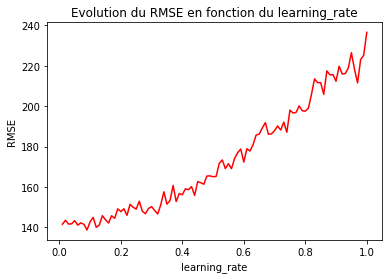

In [190]:
plt.plot(list_learning_rate, list_rmse, color='r')
plt.title("Evolution du RMSE en fonction du learning_rate")
plt.ylabel("RMSE")
plt.xlabel("learning_rate")
plt.show()

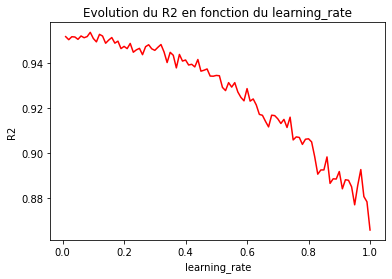

In [191]:
plt.plot(list_learning_rate, list_r2, color='r')
plt.title("Evolution du R2 en fonction du learning_rate")
plt.ylabel("R2")
plt.xlabel("learning_rate")
plt.show()

On peut voir clairement que le learning_rate influe enormement sur le surapprentissage du modèle

#Attention ce code met plus d'une heure à tourner, je l'ai mis en texte brute pour ne pas bloquer la compilation globale une fois qu'on a déjà trouvé nos paramètres

#Regardons maintenant les meilleurs paramètres
meilleur_parametre = "Aucun"
best_r2 = 0
for i in range(1,101):
    learning_r= 0.01 *i
    for j in range(1,51):
        nb_estimators = 100 * j
        for k in range(1,30):
            nb_leaves = 10 *k
            r2,rmse = LGB(learning_r,nb_estimators,100)
            if r2 > best_r2 :
                best_r2 = r2
                meilleur_parametre = "learning rate = " + str(learning_r) + " ,nb_estimators = " + str(nb_estimators) + " ,leaves = " + str(nb_leaves)
print("les meilleurs paramètres pour LGB sont : " + meilleur_parametre)
#les meilleurs paramètres pour LGB sont : learning rate = 0.08, nb_estimators = 3600, leaves = 100

In [192]:
r2_lgb, rmse_lgb = LGB(0.08,3600,100)

[1]	valid_0's rmse: 604.031	valid_0's l2: 364853
Training until validation scores don't improve for 10 rounds
[2]	valid_0's rmse: 565.775	valid_0's l2: 320101
[3]	valid_0's rmse: 529.541	valid_0's l2: 280413
[4]	valid_0's rmse: 498.176	valid_0's l2: 248179
[5]	valid_0's rmse: 467.96	valid_0's l2: 218986
[6]	valid_0's rmse: 441.316	valid_0's l2: 194760
[7]	valid_0's rmse: 415.763	valid_0's l2: 172859
[8]	valid_0's rmse: 393.815	valid_0's l2: 155090
[9]	valid_0's rmse: 372.576	valid_0's l2: 138813
[10]	valid_0's rmse: 353.509	valid_0's l2: 124968
[11]	valid_0's rmse: 335.938	valid_0's l2: 112854
[12]	valid_0's rmse: 320.483	valid_0's l2: 102710
[13]	valid_0's rmse: 306.48	valid_0's l2: 93929.8
[14]	valid_0's rmse: 294.127	valid_0's l2: 86510.9
[15]	valid_0's rmse: 282.003	valid_0's l2: 79525.8
[16]	valid_0's rmse: 270.874	valid_0's l2: 73372.5
[17]	valid_0's rmse: 261.987	valid_0's l2: 68637
[18]	valid_0's rmse: 253.283	valid_0's l2: 64152.3
[19]	valid_0's rmse: 246.542	valid_0's l2: 607

[184]	valid_0's rmse: 143.422	valid_0's l2: 20570
[185]	valid_0's rmse: 143.421	valid_0's l2: 20569.7
[186]	valid_0's rmse: 143.45	valid_0's l2: 20577.9
[187]	valid_0's rmse: 143.426	valid_0's l2: 20571
[188]	valid_0's rmse: 143.446	valid_0's l2: 20576.7
[189]	valid_0's rmse: 143.456	valid_0's l2: 20579.5
[190]	valid_0's rmse: 143.46	valid_0's l2: 20580.9
[191]	valid_0's rmse: 143.477	valid_0's l2: 20585.7
[192]	valid_0's rmse: 143.494	valid_0's l2: 20590.5
[193]	valid_0's rmse: 143.495	valid_0's l2: 20590.8
[194]	valid_0's rmse: 143.412	valid_0's l2: 20567.1
[195]	valid_0's rmse: 143.419	valid_0's l2: 20569.1
[196]	valid_0's rmse: 143.392	valid_0's l2: 20561.4
[197]	valid_0's rmse: 143.4	valid_0's l2: 20563.6
[198]	valid_0's rmse: 143.439	valid_0's l2: 20574.6
[199]	valid_0's rmse: 143.363	valid_0's l2: 20552.9
[200]	valid_0's rmse: 143.316	valid_0's l2: 20539.5
[201]	valid_0's rmse: 143.285	valid_0's l2: 20530.7
[202]	valid_0's rmse: 143.254	valid_0's l2: 20521.8
[203]	valid_0's rmse

[351]	valid_0's rmse: 141.495	valid_0's l2: 20020.7
[352]	valid_0's rmse: 141.512	valid_0's l2: 20025.7
Early stopping, best iteration is:
[342]	valid_0's rmse: 141.459	valid_0's l2: 20010.7


In [193]:
print("Nous avons comme RMSE : " + str(rmse_lgb) + " et comme R2 : " + str(r2_lgb))

Nous avons comme RMSE : 141.45932566558147 et comme R2 : 0.9519718672420505


## XGBoost

XGBoost est le deuxième algorithme de boosting que nous allons essayé, il est connu pour être l'un des plus efficace et flexible. Cependant le temps de traitement et la mémoire demandée reste plus élevé.

In [194]:
#installation de la bibliothèque
#!pip install xgboost

In [195]:
import xgboost as xgb
boost_params = {'eval_metric': 'rmse'}
model_xgboost = xgb.XGBRegressor(max_depth=10,
                                 learning_rate=0.1,
                                 n_estimators=1500,
                                 objective='reg:squarederror',
                                 gamma=0,
                                 min_child_weight=1,
                                 subsample=1,
                                 colsample_bytree=1,
                                 scale_pos_weight=1,
                                 seed=42,
                                 **boost_params)
model_xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1500, n_jobs=8,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [196]:
#Prediction et calcul du R2 et RMSE
y_test_predict = model_xgboost.predict(X_test)
rmse_xgboost = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_xgboost = r2_score(y_test, y_test_predict)
print("Nous avons comme RMSE : " + str(rmse_xgboost) + " et comme R2 : " + str(r2_xgboost))

Nous avons comme RMSE : 152.93938387140994 et comme R2 : 0.9438601551579718


Améliorons le modèle en changeant les paramètres :

In [197]:
import xgboost as xgb
boost_params = {'eval_metric': 'rmse'}
model_xgboost = xgb.XGBRegressor(max_depth=6,
                                 learning_rate=0.18,
                                 n_estimators=5000,
                                 objective='reg:squarederror',
                                 gamma=0,
                                 min_child_weight=1,
                                 subsample=1,
                                 colsample_bytree=1,
                                 scale_pos_weight=1,
                                 seed=42,
                                 **boost_params)
model_xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.18, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=8,
             num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=42, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [198]:
from sklearn.model_selection import cross_val_score

#Prediction et calcul du R2 et RMSE
y_test_predict = model_xgboost.predict(X_test)
rmse_xgboost = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_xgboost = max(cross_val_score(model_xgboost, X_test, y_test, scoring='r2', cv=20))
print("Nous avons comme RMSE : " + str(rmse_xgboost) + " et comme R2 : " + str(r2_xgboost))

Nous avons comme RMSE : 146.41369182541035 et comme R2 : 0.9494522649478416


## CatBoost

CatBoost est le dernier algorithme de boosting que nous allons essayé, il est connu pour être plus performant que xgboost sur des données plus petites.Cependant le temps de traitement est très elevé. Il est arrivé très recemment en 2017. 

In [199]:
#Création des pools d'entrainement et de test à partir de nos données
from catboost import Pool, CatBoostRegressor

train_dataset = Pool(data=X_train,
                     label=y_train)

test_dataset = Pool(data=X_test,
                    label=y_test)

In [200]:
#Ayant un temps de traitement élevé, nous avons modifier les paramètres à la main 
#car les boucles de plus de 2 for était vraiment vraiment longue

# Initialisation de CatBoostClassifier
model_CatBoost = CatBoostRegressor(iterations=7000,
                          learning_rate=0.08,
                          depth=10,
                          eval_metric='R2',
                          random_seed = 42,
                          bagging_temperature = 0.6,
                          random_strength = 0.6 ,
                          od_type='Iter',
                          metric_period = 300,
                          od_wait=150,
                          use_best_model=True)

# Entraine les modèles et garde le meilleur modele
model_CatBoost.fit(train_dataset,eval_set=test_dataset,use_best_model=True)

0:	learn: 0.1082385	test: 0.1025427	best: 0.1025427 (0)	total: 183ms	remaining: 21m 19s
300:	learn: 0.9866469	test: 0.9524915	best: 0.9524915 (300)	total: 6.02s	remaining: 2m 13s
600:	learn: 0.9952368	test: 0.9564597	best: 0.9564609 (599)	total: 11.7s	remaining: 2m 4s
900:	learn: 0.9978591	test: 0.9580602	best: 0.9580602 (900)	total: 17.3s	remaining: 1m 57s
1200:	learn: 0.9988724	test: 0.9587170	best: 0.9587170 (1200)	total: 23s	remaining: 1m 51s
1500:	learn: 0.9993562	test: 0.9589916	best: 0.9589916 (1475)	total: 28.7s	remaining: 1m 45s
1800:	learn: 0.9996075	test: 0.9591794	best: 0.9591813 (1781)	total: 34.7s	remaining: 1m 40s
2100:	learn: 0.9997549	test: 0.9593002	best: 0.9593017 (2095)	total: 40.4s	remaining: 1m 34s
2400:	learn: 0.9998434	test: 0.9593618	best: 0.9593654 (2364)	total: 45.9s	remaining: 1m 27s
2700:	learn: 0.9998976	test: 0.9594320	best: 0.9594324 (2699)	total: 51.5s	remaining: 1m 22s
3000:	learn: 0.9999315	test: 0.9594868	best: 0.9594873 (2998)	total: 57.2s	remaining

In [201]:
from sklearn.metrics import mean_squared_error

#Prediction et calcul du R2 et RMSE
y_test_predict = model_CatBoost.predict(X_test)
rmse_catboost = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_catboost = r2_score(y_test, y_test_predict)
print("Nous avons comme RMSE : " + str(rmse_catboost) + " et comme R2 : " + str(r2_catboost))

Nous avons comme RMSE : 129.77461981843837 et comme R2 : 0.9595785334780688


Conclusion Catboost est l'algorithme de boosting nous offrant le meilleur score, cela n'est pas étonnant car il converge plus rapidement sur des meilleurs résultats avec des données moins conséquentes.

## Conclusion sur les modèles

Text(0.5, 0, 'Algorithme utilisé')

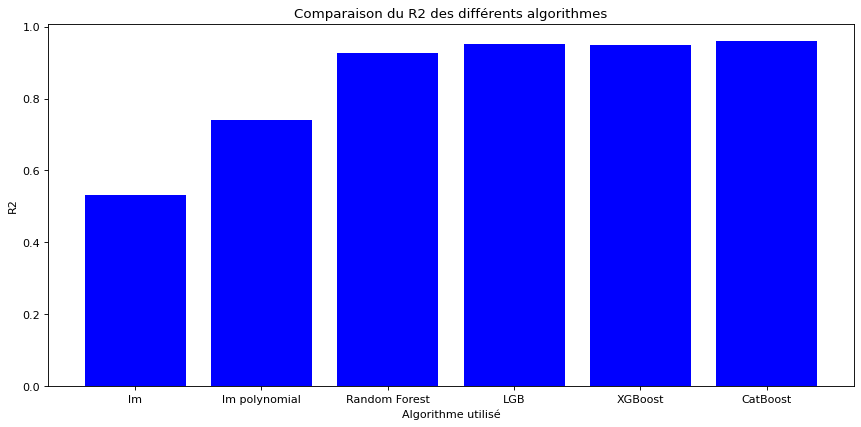

In [202]:
from matplotlib.pyplot import figure

list_model_r2 = [r2_reg_simple,r2_reg_polynomiale,r2_svm,r2_lgb,r2_xgboost,r2_catboost]
list_model_nom = ["lm","lm polynomial","Random Forest","LGB","XGBoost","CatBoost"]

figure(num=None, figsize=(13, 6), dpi=80, facecolor='w', edgecolor='k')
plt.bar(list_model_nom, list_model_r2, color='b')
plt.title("Comparaison du R2 des différents algorithmes")
plt.ylabel("R2")
plt.xlabel("Algorithme utilisé")

Pour répondre à cette problématiques de regression linéaire supervisé, nous avons utilisé différent algorithme afin d'étudier dans un premier temps d'étudier ceux-ci et également dans l'optique d'améliorer nos prédictions afin d'obtenir le meilleur modèle pour notre API. Ci-dessus on peut la comparaison entre les différents résultats que nous avons pu avoir.
On remarque une domination des algorithmes de boosting parmis les meilleurs résultats. En l'occurence CatBoost est celui ayant retourner les meilleures prédictions, cela s'explique en grande partie par le fait qu'il fit très rapidement par rapport à ses oncurrents sur des données moins abondante.

# Enregistement du meilleur modèle

Afin de rendre disponible notre modèle sous forme d'API, nous enregistrons notre meilleur modèle cest-à-dire le modèle basé sur CatBoost

In [203]:
import pickle
filename = 'catboost_model' 
pickle.dump(model_CatBoost, open(filename, 'wb'))

# Conclusion Globale sur cette étude

Pour conclure, sur ce projet nous avons pu nous mettre à la place d'un data scientist confronté à un jeu de données inconnu. On a ainsi pu analyser la problèmatique et les données fournies pour essayer d'y répondre. A la suite de cette analyse, nous avons pu dégager des colonnes intéressantes pour la création des modèles. Ceux-ci ont nécessité beaucoup de travail de notre part afin de trouver le meilleur. Nous sommes ravi d'avoir pu étudier et mettre en pratique les différents aspects d'une étude.

# Bonus : Participation concours Kaggle

En regardant notre dataset sur internet, nous sommes tombés sur un concours kaggle lié (https://www.kaggle.com/c/seoul-bike-rental-prediction/overview). Celui-ci n'a pas eu beaucoup de participants et aucune personne n'a fait d'étude poussée dessus. Nous avons vu que nous pouvions toujours participer à ce concours. Nous avons alors décidé de participer pour tester notre modèle.

Ce concours se base sur le r2 comme évalutation. Il faut soumettre un fichier csv avec comme colonne :
- id_test
- nombre de vélos loués

In [204]:
#Lecture du dataset
import pandas as pd
df_train = pd.read_csv("data_concours/train.csv")
df_test = pd.read_csv("data_concours/test.csv")

In [205]:
#Transformation des données pour notre modèle

#train
df_train["Date"] = pd.to_datetime(df_train["Date"],dayfirst=True)
df_train["Year"] = df_train["Date"].apply(lambda x: x.year)
df_train["Month"] = df_train["Date"].apply(lambda x: x.month)
df_train["Day"] = df_train["Date"].apply(lambda x: x.day)
df_train["DayOfWeek"] = df_train["Date"].dt.dayofweek
df_train["isWeekEnd"] = [True if int(x)>4 else False for x in df_train["DayOfWeek"]]
mapping = {k: v for v, k in enumerate(df_train["Season"].unique())}
df_train['Season'] = df_train["Season"].map(mapping)
df_train = df_train.drop('Date', 1)

#test
df_test["Date"] = pd.to_datetime(df_test["Date"],dayfirst=True)
df_test["Year"] = df_test["Date"].apply(lambda x: x.year)
df_test["Month"] = df_test["Date"].apply(lambda x: x.month)
df_test["Day"] = df_test["Date"].apply(lambda x: x.day)
df_test["DayOfWeek"] = df_test["Date"].dt.dayofweek
df_test["isWeekEnd"] = [True if int(x)>4 else False for x in df_test["DayOfWeek"]]
mapping = {k: v for v, k in enumerate(df_test["Season"].unique())}
df_test['Season'] = df_test["Season"].map(mapping)
df_test = df_test.drop('Date', 1)

#Séparation en train validation
from sklearn.model_selection import train_test_split
y = df_train.pop('Bikes_Rented')
X = df_train
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [206]:
#Utilisation de notre modèle
from catboost import Pool, CatBoostRegressor

train_dataset = Pool(data=X_train,
                     label=y_train)

test_dataset = Pool(data=X_test,
                    label=y_test)

# Initialisation de CatBoostClassifier
model_CatBoost = CatBoostRegressor(iterations=7000,
                          learning_rate=0.08,
                          depth=10,
                          eval_metric='R2',
                          random_seed = 42,
                          bagging_temperature = 0.6,
                          random_strength = 0.6 ,
                          od_type='Iter',
                          metric_period = 1000,
                          od_wait=150,
                          use_best_model=True)

# Entraine les modèles et garde le meilleur modele
model_CatBoost.fit(train_dataset,eval_set=test_dataset,use_best_model=True)

0:	learn: 0.1113308	test: 0.1142352	best: 0.1142352 (0)	total: 22ms	remaining: 2m 33s
1000:	learn: 0.9985358	test: 0.9674891	best: 0.9674937 (999)	total: 21.2s	remaining: 2m 6s
2000:	learn: 0.9998056	test: 0.9682099	best: 0.9682121 (1999)	total: 42.4s	remaining: 1m 45s
3000:	learn: 0.9999619	test: 0.9683918	best: 0.9683918 (2953)	total: 1m 3s	remaining: 1m 24s
4000:	learn: 0.9999909	test: 0.9684409	best: 0.9684409 (4000)	total: 1m 25s	remaining: 1m 3s
5000:	learn: 0.9999976	test: 0.9684504	best: 0.9684512 (4951)	total: 1m 46s	remaining: 42.7s
6000:	learn: 0.9999993	test: 0.9684582	best: 0.9684584 (5952)	total: 2m 7s	remaining: 21.3s
Stopped by overfitting detector  (150 iterations wait)

bestTest = 0.9684588081
bestIteration = 6049

Shrink model to first 6050 iterations.


In [207]:
#Creation du dataset à rendre
y_test_predict = model_CatBoost.predict(df_test)

sample_submission = pd.DataFrame(data=df_test["Id"])
sample_submission["Bikes_Rented"] = y_test_predict.astype(int)

sample_submission.to_csv('sample_submission.csv',encoding='utf-8',index=False)

Après upload sur le concours kaggle, nous avons obtenu un R2 de : (cf : resultat_concours_kaggle.png)
- Private Score : 0.93549
- Public Score : 0.94942

Ce qui nous place sur la première place du concours (de 10 participants) qui a eu lieu, il y a 5 mois.

**On en conclut donc que notre modèle est performant par rapport à la problématique demandée**